# VGG WITH CIFAR



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.2935 - loss: 1.8743 - val_accuracy: 0.5204 - val_loss: 1.2990
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.5643 - loss: 1.1951 - val_accuracy: 0.6622 - val_loss: 0.9472
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.6738 - loss: 0.9149 - val_accuracy: 0.7178 - val_loss: 0.7962
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7394 - loss: 0.7394 - val_accuracy: 0.7556 - val_loss: 0.7042
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.7907 - loss: 0.6000 - val_accuracy: 0.7670 - val_loss: 0.6703
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.8290 - loss: 0.4860 - val_accuracy: 0.7798 - val_loss: 0.6573
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8710 - loss: 0.3821 - val_accuracy: 0.7818 - val_loss: 0.6627
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9044 -

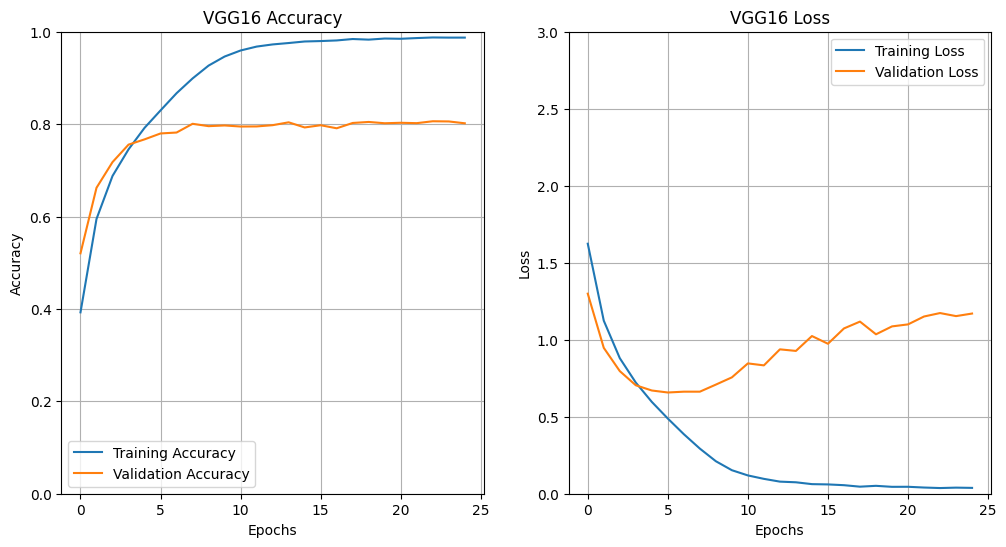

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define VGG16 Architecture
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize VGG16 Model
vgg16_model = build_vgg16((32, 32, 3), 10)
vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train VGG16 Model
vgg16_history = vgg16_model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


# Plot Accuracy and Loss for VGG16 with normalized scales
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


# VGG transfer learning after saving it as pretrained(cifar)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.3773 - loss: 1.8245 - val_accuracy: 0.5223 - val_loss: 1.3845
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5419 - loss: 1.3434 - val_accuracy: 0.5508 - val_loss: 1.2993
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5691 - loss: 1.2602 - val_accuracy: 0.5662 - val_loss: 1.2499
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5819 - loss: 1.2159 - val_accuracy: 0.5768 - val_loss: 1.2230
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5978 - loss: 1.1757 - val_accuracy: 0.5804 - val_loss: 1.2062
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6028 - loss: 1.1550 - val_accuracy: 0.5822 - val_loss: 1.1949
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6120 - loss: 1.1270 - val_accuracy: 0.5869 - val_loss: 1.1811
Epoch 8/25
1250/1250 ━

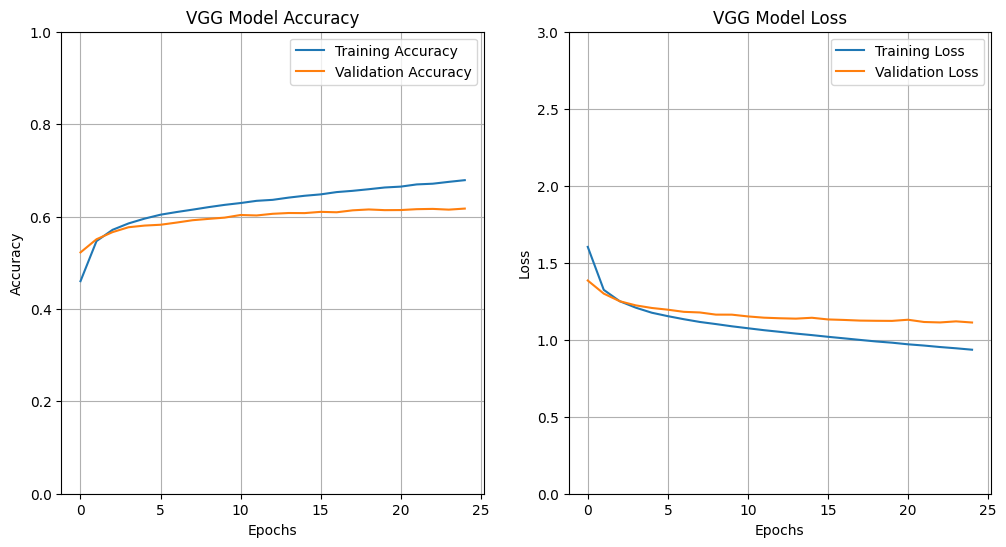

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Evaluation Metrics:
Train - Accuracy: 0.69, F1 Score: 0.68, ROC-AUC: 0.95
Validation - Accuracy: 0.62, F1 Score: 0.62, ROC-AUC: 0.93
Test - Accuracy: 0.61, F1 Score: 0.61, ROC-AUC: 0.93


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values to [0, 1]
train_labels_onehot = to_categorical(train_labels, num_classes=10)  # One-hot encode labels
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as validation
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))  # 80% training, 20% validation
val_images, val_labels = train_images[val_split:], train_labels_onehot[val_split:]
train_images_split, train_labels_split = train_images[:val_split], train_labels_onehot[:val_split]

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(model, train_images_split, train_labels_split, val_images, val_labels, test_images, test_labels_onehot)

# ResNet with CIFAr


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.2539 - loss: 1.9767 - val_accuracy: 0.4130 - val_loss: 1.5937
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.4241 - loss: 1.5627 - val_accuracy: 0.4778 - val_loss: 1.4511
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4778 - loss: 1.4223 - val_accuracy: 0.5165 - val_loss: 1.3318
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5245 - loss: 1.3112 - val_accuracy: 0.5535 - val_loss: 1.2314
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5604 - loss: 1.2247 - val_accuracy: 0.5713 - val_loss: 1.1920
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5908 - loss: 1.1454 - val_accuracy: 0.6068 - val_loss: 1.1126
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6133 - loss: 1.0927 - val_accuracy: 0.6138 - val_loss: 1.0815
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6291 -

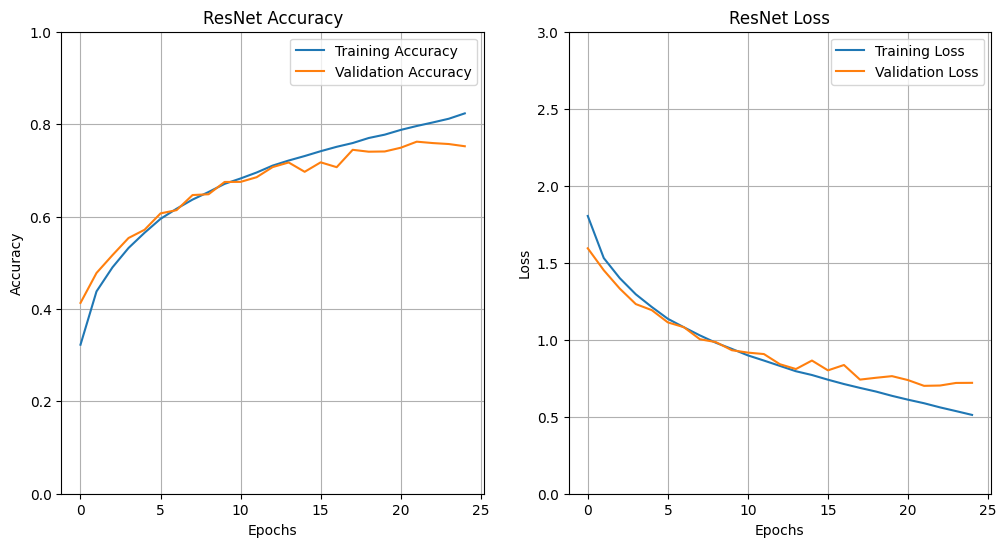

In [ ]:
# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Initialize ResNet Model
resnet_model = build_resnet((32, 32, 3), 10)
resnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train ResNet Model
resnet_history = resnet_model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for ResNet with normalized scales
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('ResNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()



# Resnet transfer learning after saving it as pretrained(cifar)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.1827 - loss: 2.2300 - val_accuracy: 0.2550 - val_loss: 2.0100
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.2799 - loss: 1.9895 - val_accuracy: 0.3281 - val_loss: 1.9093
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3116 - loss: 1.9202 - val_accuracy: 0.3222 - val_loss: 1.8760
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3280 - loss: 1.8773 - val_accuracy: 0.3449 - val_loss: 1.8324
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3410 - loss: 1.8429 - val_accuracy: 0.3533 - val_loss: 1.8203
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3524 - loss: 1.8100 - val_accuracy: 0.3428 - val_loss: 1.8312
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3601 - loss: 1.7942 - val_accuracy: 0.3641 - val_loss: 1.7808
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3702 -

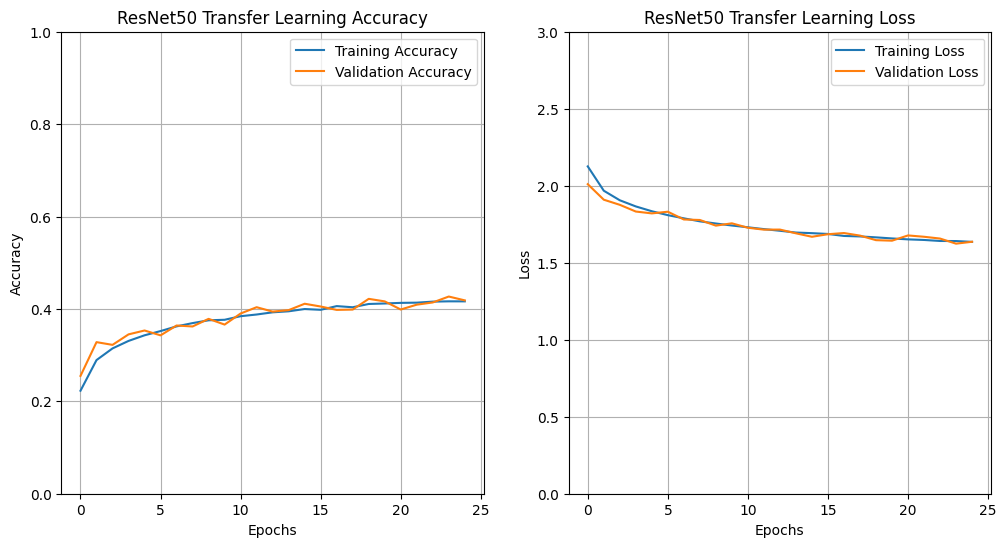

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Evaluation Metrics:
Train - Accuracy: 0.43, F1 Score: 0.43, ROC-AUC: 0.85
Validation - Accuracy: 0.42, F1 Score: 0.42, ROC-AUC: 0.84
Test - Accuracy: 0.43, F1 Score: 0.43, ROC-AUC: 0.84


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values
train_labels_onehot = to_categorical(train_labels, num_classes=10)  # One-hot encode labels
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Load pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as validation
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Transfer Learning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Transfer Learning Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels_onehot[val_split:]
train_images_split, train_labels_split = train_images[:val_split], train_labels_onehot[:val_split]

evaluate_metrics(model, train_images_split, train_labels_split, val_images, val_labels, test_images, test_labels_onehot)

# GoogleNet with cifar


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.2223 - loss: 2.0447 - val_accuracy: 0.3616 - val_loss: 1.6908
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3627 - loss: 1.6772 - val_accuracy: 0.4352 - val_loss: 1.5410
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4139 - loss: 1.5687 - val_accuracy: 0.4681 - val_loss: 1.4562
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4508 - loss: 1.4770 - val_accuracy: 0.4555 - val_loss: 1.4658
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4815 - loss: 1.4124 - val_accuracy: 0.5081 - val_loss: 1.3544
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5002 - loss: 1.3585 - val_accuracy: 0.5028 - val_loss: 1.3409
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5176 - loss: 1.3272 - val_accuracy: 0.5411 - val_loss: 1.2706
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5308 - loss: 1.2870

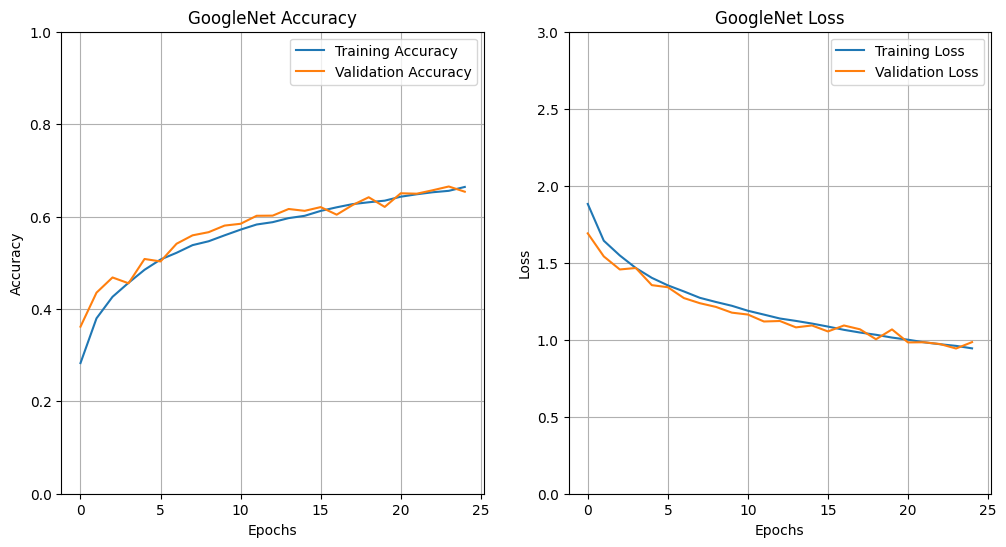

In [ ]:
# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Initialize GoogleNet Model
googlenet_model = build_googlenet((32, 32, 3), 10)
googlenet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train GoogleNet Model
googlenet_history = googlenet_model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for GoogleNet with normalized scales
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(googlenet_history.history['accuracy'], label='Training Accuracy')
plt.plot(googlenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GoogleNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(googlenet_history.history['loss'], label='Training Loss')
plt.plot(googlenet_history.history['val_loss'], label='Validation Loss')
plt.title('GoogleNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


# GoogleNet transfer learning after saving it as pretrained(cifar)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 38ms/step - accuracy: 0.4512 - loss: 1.6038 - val_accuracy: 0.5936 - val_loss: 1.1934
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.6361 - loss: 1.0722 - val_accuracy: 0.6051 - val_loss: 1.1337
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.6711 - loss: 0.9698 - val_accuracy: 0.6170 - val_loss: 1.1114
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.6941 - loss: 0.8996 - val_accuracy: 0.6199 - val_loss: 1.1070
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.7195 - loss: 0.8387 - val_accuracy: 0.6227 - val_loss: 1.1007
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.7442 - loss: 0.7693 - val_accuracy: 0.6165 - val_loss: 1.1058
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7697 - loss: 0.7134 - val_accuracy: 0.6188 - val_loss: 1.1140
Epoch 8/25
1250/1250 ━━━━

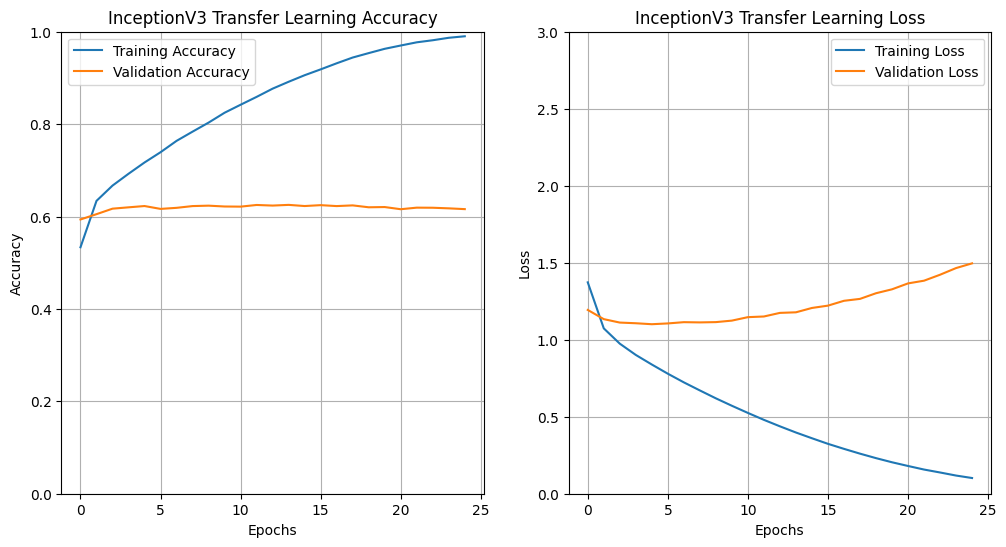

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.62, F1 Score: 0.62, ROC-AUC: 0.92
Test - Accuracy: 0.62, F1 Score: 0.62, ROC-AUC: 0.92


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Resize images to 75x75 (minimum input size for InceptionV3)
def resize_images(images, target_size=(75, 75)):
    return tf.image.resize(images, target_size)

train_images = resize_images(train_images)
test_images = resize_images(test_images)

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Load pre-trained InceptionV3 model (excluding top layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as validation
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('InceptionV3 Transfer Learning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('InceptionV3 Transfer Learning Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels_onehot[val_split:]
train_images_split, train_labels_split = train_images[:val_split], train_labels_onehot[:val_split]

evaluate_metrics(model, train_images_split, train_labels_split, val_images, val_labels, test_images, test_labels_onehot)

# Setio with cifar

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1992 - loss: 2.1498 - val_accuracy: 0.4071 - val_loss: 1.6946
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3742 - loss: 1.7267 - val_accuracy: 0.4513 - val_loss: 1.5316
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4222 - loss: 1.5980 - val_accuracy: 0.4838 - val_loss: 1.4495
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4496 - loss: 1.5213 - val_accuracy: 0.5042 - val_loss: 1.3944
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4686 - loss: 1.4686 - val_accuracy: 0.5094 - val_loss: 1.3685
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4884 - loss: 1.4168 - val_accuracy: 0.5360 - val_loss: 1.3014
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5047 - loss: 1.3791 - val_accuracy: 0.5562 - val_loss: 1.2641
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5243 - loss: 1.3343 -

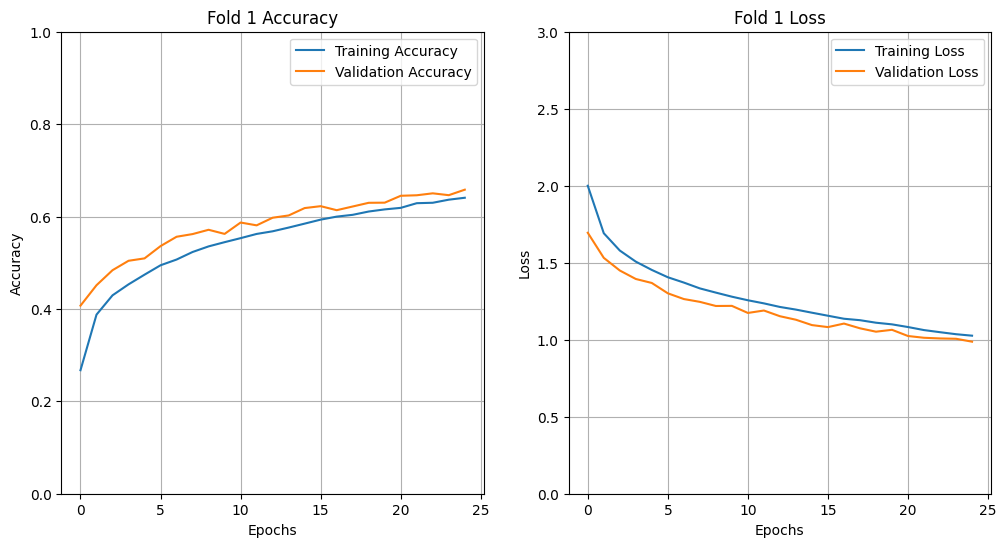

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.69, F1 Score: 0.69, ROC-AUC: 0.95
Validation - Accuracy: 0.66, F1 Score: 0.65, ROC-AUC: 0.94
Test - Accuracy: 0.66, F1 Score: 0.65, ROC-AUC: 0.94
Confusion Matrix:
[[747  20  71  17  15   4  10   8  80  28]
 [ 38 791   6  11   7   2  13   7  43  82]
 [ 76  10 552  54 109  64  79  31  16   9]
 [ 25   8 115 431  78 146 103  40  31  23]
 [ 36   7 128  51 581  24  78  76  17   2]
 [ 16   5 112 166  63 525  40  50  17   6]
 [  9   2  47  65  44  13 799   5  10   6]
 [ 24   4  40  37  90  71  13 689   9  23]
 [ 91  38  19  10   6   5   3   4 805  19]
 [ 54 169   8  15  11   8  16  24  57 638]]
Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2081 - loss: 2.1243 - val_accuracy: 0.3984 - val_loss: 1.6771
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3747 - loss: 1.7059 - val_accuracy: 0.4479 - val_loss: 1.5323
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4227 - loss: 1.5876 - val_accuracy: 0.4788 - val_loss: 1.4732
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4487 - loss: 1.5028 - val_accuracy: 0.5115 - val_loss: 1.3934
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4811 - loss: 1.4389 - val_accuracy: 0.5309 - val_loss: 1.3129
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5015 - loss: 1.3853 - val_accuracy: 0.5391 - val_loss: 1.3012
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5191 - loss: 1.3434 - val_accuracy: 0.5623 - val_loss: 1.2415
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5339 - loss: 1.3090 - 

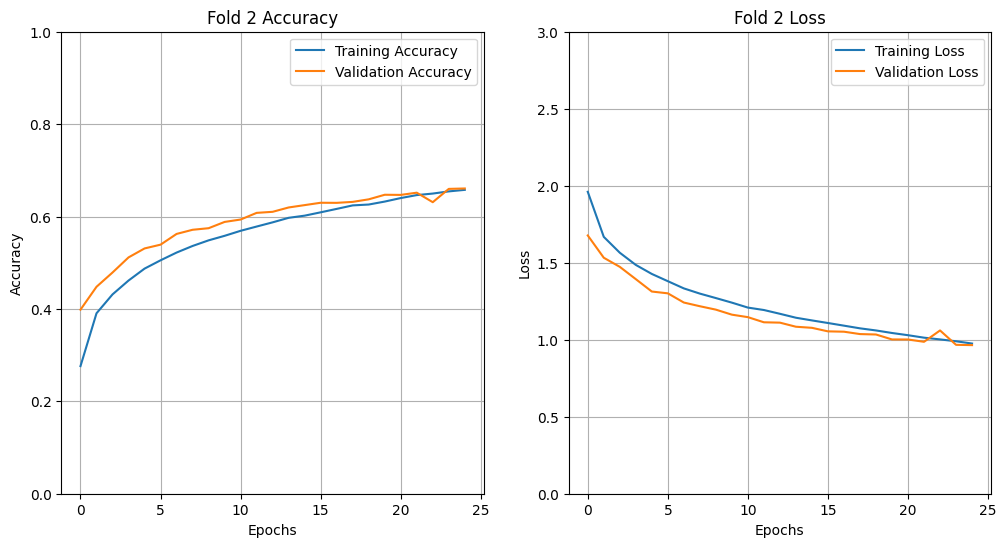

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Evaluation Metrics:
Train - Accuracy: 0.70, F1 Score: 0.70, ROC-AUC: 0.96
Validation - Accuracy: 0.66, F1 Score: 0.66, ROC-AUC: 0.94
Test - Accuracy: 0.67, F1 Score: 0.67, ROC-AUC: 0.95
Confusion Matrix:
[[667  12  80  21  37   8  14  21  94  46]
 [ 21 688   8  18   8   5  14  12  35 191]
 [ 54   2 495  75 149  76  76  53  10  10]
 [  9   4  82 505  78 168  67  48  14  25]
 [ 16   5  65  55 661  25  68  87  16   2]
 [  5   2  66 214  58 537  20  79  11   8]
 [  5   2  40  91  63  13 759  11   9   7]
 [  9   0  27  45  76  62   5 755   3  18]
 [ 64  29  12  24  13   3  10  12 799  34]
 [ 23  65   7  13   3   9  12  33  41 794]]
Fold 3/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2154 - loss: 2.1102 - val_accuracy: 0.4167 - val_loss: 1.6644
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3782 - loss: 1.7077 - val_accuracy: 0.4552 - val_loss: 1.5256
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4272 - loss: 1.5694 - val_accuracy: 0.4893 - val_loss: 1.4278
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4584 - loss: 1.4900 - val_accuracy: 0.4934 - val_loss: 1.3937
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4785 - loss: 1.4417 - val_accuracy: 0.5258 - val_loss: 1.3399
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4966 - loss: 1.3903 - val_accuracy: 0.5351 - val_loss: 1.2963
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5147 - loss: 1.3507 - val_accuracy: 0.5530 - val_loss: 1.2653
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5217 - loss: 1.3267 - 

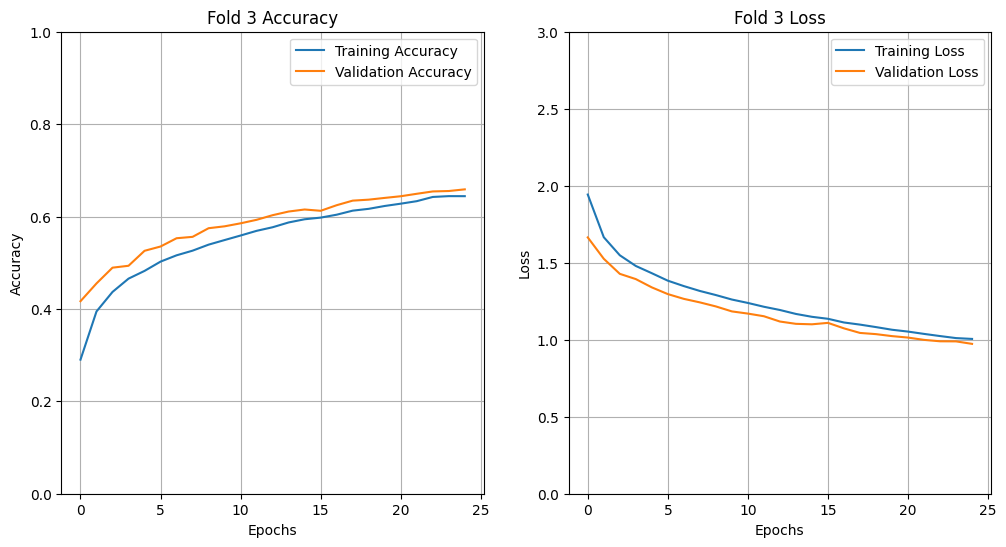

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.69, F1 Score: 0.69, ROC-AUC: 0.95
Validation - Accuracy: 0.66, F1 Score: 0.65, ROC-AUC: 0.94
Test - Accuracy: 0.66, F1 Score: 0.66, ROC-AUC: 0.94
Confusion Matrix:
[[758  19  38  13  11   7   8  10  84  52]
 [ 21 768   6   4   2   4  11   5  30 149]
 [ 85  11 452  58 142  89  67  46  20  30]
 [ 36  19  67 387  95 198  81  60  23  34]
 [ 37   6  54  40 620  38  64 116  21   4]
 [ 14   4  59 141  61 591  29  73  13  15]
 [  8   4  39  64  70  27 737  20   7  24]
 [ 16   6  19  28  63  59  11 767   5  26]
 [ 83  48  12  12   3   6   2   3 790  41]
 [ 36 122   9   8   4   6   7  14  28 766]]
Fold 4/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2103 - loss: 2.1329 - val_accuracy: 0.4057 - val_loss: 1.6897
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3733 - loss: 1.7164 - val_accuracy: 0.4436 - val_loss: 1.5671
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4179 - loss: 1.6035 - val_accuracy: 0.4760 - val_loss: 1.4607
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4466 - loss: 1.5223 - val_accuracy: 0.4995 - val_loss: 1.4035
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4769 - loss: 1.4537 - val_accuracy: 0.5062 - val_loss: 1.3881
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4838 - loss: 1.4216 - val_accuracy: 0.5184 - val_loss: 1.3442
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4992 - loss: 1.3859 - val_accuracy: 0.5381 - val_loss: 1.2950
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5127 - loss: 1.3571 - 

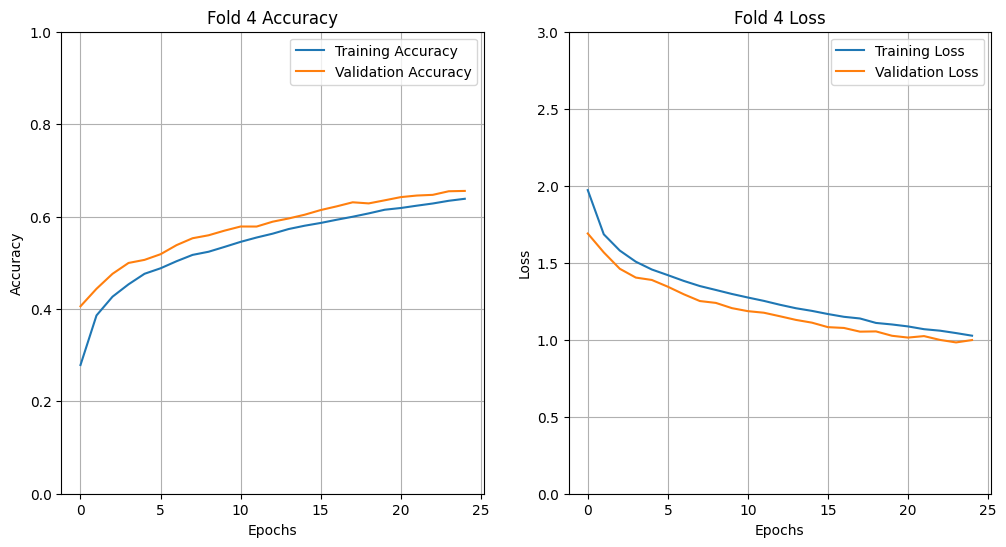

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Evaluation Metrics:
Train - Accuracy: 0.68, F1 Score: 0.68, ROC-AUC: 0.95
Validation - Accuracy: 0.66, F1 Score: 0.65, ROC-AUC: 0.94
Test - Accuracy: 0.65, F1 Score: 0.65, ROC-AUC: 0.94
Confusion Matrix:
[[720  39  47  16   6   4   4   6 103  55]
 [ 14 856   1   6   2   7   4   1  27  82]
 [ 88  18 513  82  67  92  52  46  20  22]
 [ 37  26  86 431  50 204  59  45  27  35]
 [ 40  12 117  77 499  56  51 120  20   8]
 [ 22   5  78 175  32 590  16  47  16  19]
 [ 11  20  68  92  35  33 694   8  18  21]
 [ 22   8  39  37  41  89   6 712   8  38]
 [ 61  60  11  12   3   5   2   2 818  26]
 [ 28 197   5  13   3   7   6  17  45 679]]
Fold 5/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2000 - loss: 2.1435 - val_accuracy: 0.4075 - val_loss: 1.7081
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3724 - loss: 1.7403 - val_accuracy: 0.4477 - val_loss: 1.5458
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4223 - loss: 1.5984 - val_accuracy: 0.4674 - val_loss: 1.4743
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4514 - loss: 1.5084 - val_accuracy: 0.4903 - val_loss: 1.4093
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4654 - loss: 1.4711 - val_accuracy: 0.5117 - val_loss: 1.3598
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4888 - loss: 1.4186 - val_accuracy: 0.5184 - val_loss: 1.3356
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4984 - loss: 1.3905 - val_accuracy: 0.5342 - val_loss: 1.3056
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5144 - loss: 1.3568 - 

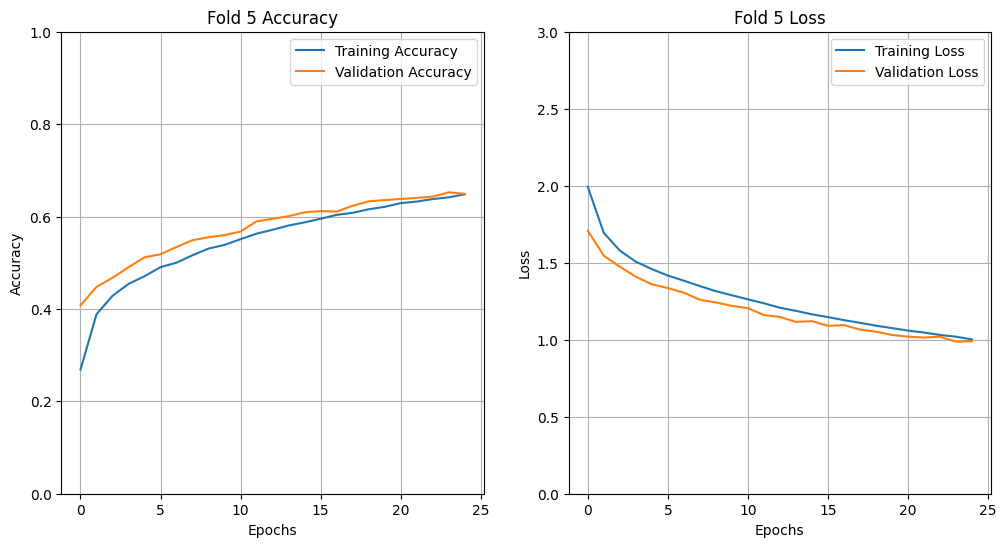

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Evaluation Metrics:
Train - Accuracy: 0.69, F1 Score: 0.69, ROC-AUC: 0.95
Validation - Accuracy: 0.65, F1 Score: 0.65, ROC-AUC: 0.94
Test - Accuracy: 0.65, F1 Score: 0.65, ROC-AUC: 0.94
Confusion Matrix:
[[712  22  84  20  18   7  20   9  74  34]
 [ 29 770  15  10   5   5  21   8  20 117]
 [ 66   7 507  77 130  56  99  33  13  12]
 [ 16  13 107 460  63 141 140  28  17  15]
 [ 20   5  92  52 612  16 111  75  16   1]
 [ 10   2 104 217  71 477  56  42  12   9]
 [  4   2  38  45  43  12 836   5   5  10]
 [ 18   0  43  52  98  67  21 679   4  18]
 [ 85  50  21  18   8   6  19   5 762  26]
 [ 35 122  12  27   5   5  30  21  29 714]]

Average Metrics after 5-Fold Cross Validation:
Train Accuracy: 0.69, Validation Accuracy: 0.66, Test Accuracy: 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)



# Prepare labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# KFold Cross-Validation setup
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in kf.split(train_images):
    print(f"Fold {fold}/{n_splits}")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = train_images[train_index], train_images[val_index]
    train_fold_labels, val_fold_labels = train_labels[train_index], train_labels[val_index]

    # One-hot encode labels for training and validation
    train_labels_onehot = to_categorical(train_fold_labels, num_classes=10)
    val_labels_onehot = to_categorical(val_fold_labels, num_classes=10)

    # Build and compile the model
    model = create_setio_2d_cnn(input_shape=(32, 32, 3), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_labels_onehot, epochs=25, batch_size=32, validation_data=(val_fold_images, val_labels_onehot))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_labels_onehot, val_fold_images, val_labels_onehot, test_images, test_labels_onehot
    )

    # Store metrics
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Average metrics after all folds
print("\nAverage Metrics after 5-Fold Cross Validation:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}, Validation Accuracy: {np.mean(all_val_accuracies):.2f}, Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1: {np.mean(all_train_f1):.2f}, Validation F1: {np.mean(all_val_f1):.2f}, Test F1: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}, Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}, Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# Custom cnn with cifar

Fold 1/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/step - accuracy: 0.2869 - loss: 1.9203 - val_accuracy: 0.5401 - val_loss: 1.2858
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.5234 - loss: 1.3216 - val_accuracy: 0.6168 - val_loss: 1.0866
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.6019 - loss: 1.1223 - val_accuracy: 0.6516 - val_loss: 0.9838
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.6597 - loss: 0.9712 - val_accuracy: 0.6827 - val_loss: 0.8923
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.6988 - loss: 0.8592 - val_accuracy: 0.7054 - val_loss: 0.8496
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7337 - loss: 0.7513 - val_accuracy: 0.7187 - val_loss: 0.8019
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7785 - loss: 0.6449 - val_accuracy: 0.7334 - val_loss: 0.7781
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy:

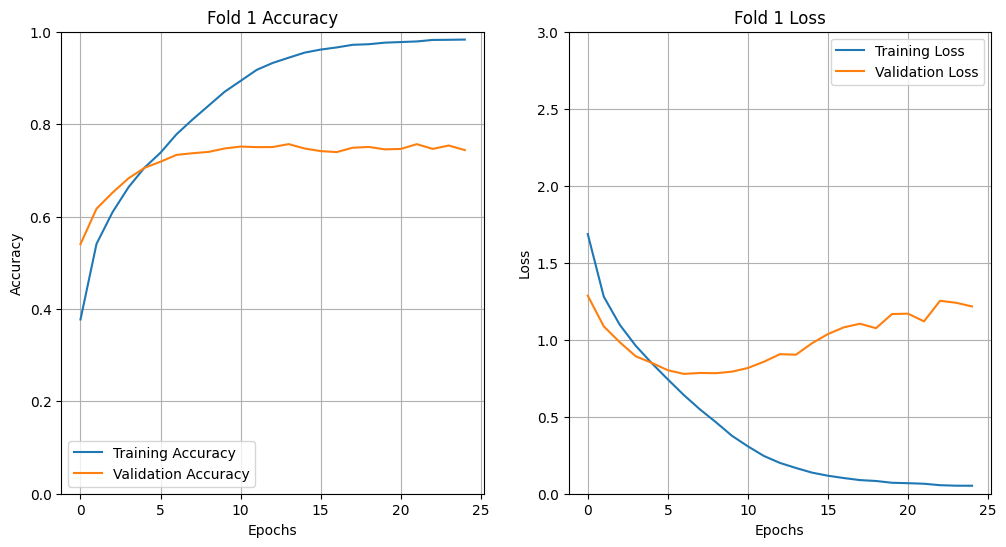

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Test - Accuracy: 0.74, F1 Score: 0.73, ROC-AUC: 0.96
Confusion Matrix:
[[796  27  27  13   9   6   5   5  62  50]
 [ 13 870   1   5   0   5   2   0  16  88]
 [ 90  13 587  75  61  62  47  28  14  23]
 [ 30  23  54 575  47 144  42  31  14  40]
 [ 35   9  83  82 604  28  53  79  20   7]
 [ 25  11  36 165  26 648  16  42  11  20]
 [  6  14  40  70  28  23 779   7  11  22]
 [ 29   3  20  35  34  59   6 781   4  29]
 [ 49  51   5   7   2   2   2   2 852  28]
 [ 23  67   4   5   2   2   2   8  23 864]]
Fold 2/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.2813 - loss: 1.9385 - val_accuracy:

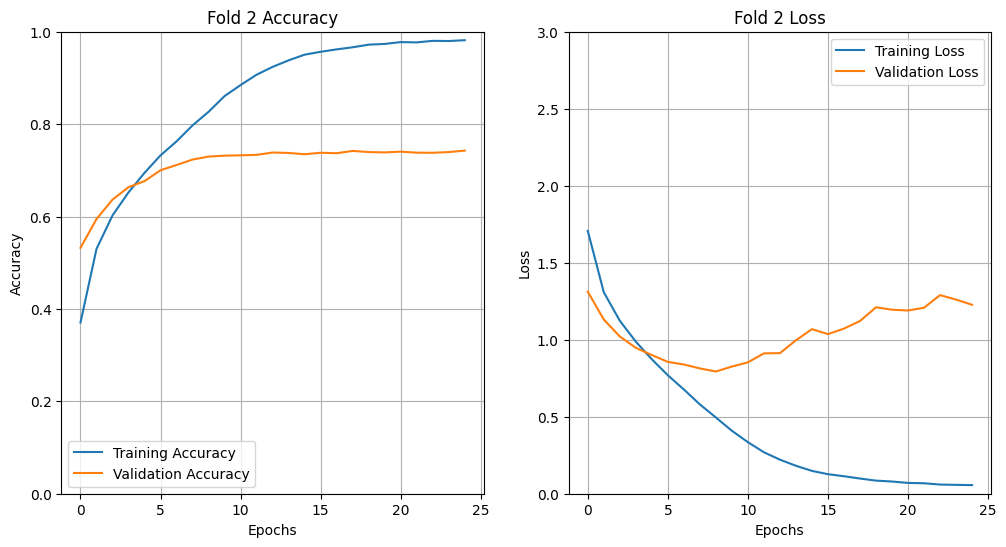

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Test - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Confusion Matrix:
[[779  19  33  23  12   7   8   8  77  34]
 [ 21 825   4  10   1   5   7   2  30  95]
 [ 84   9 551  69 103  73  57  27  16  11]
 [ 25   5  44 577  63 173  45  33  15  20]
 [ 26   5  50  65 722  37  32  47  14   2]
 [ 11   3  32 150  48 691  14  34  11   6]
 [  6   6  36  73  56  35 771   3   6   8]
 [ 19   3  24  38  65  65   3 772   2   9]
 [ 52  33   9  17   4   6   6   0 850  23]
 [ 29  55   4  20   6   4   3  12  31 836]]
Fold 3/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.2874 - loss: 1.9321 - val_accuracy:

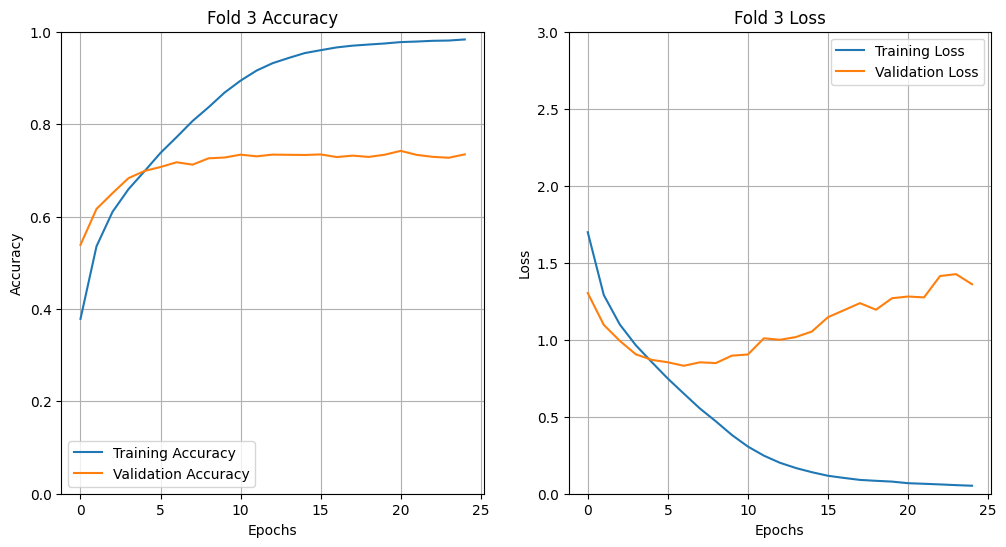

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.96
Test - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.96
Confusion Matrix:
[[784  11  63  13  13   3  13  11  55  34]
 [ 26 808   7   9   3   4   8   4  34  97]
 [ 71   0 641  52  64  48  68  33  19   4]
 [ 16  11 100 536  53 147  78  26  17  16]
 [ 20   7  92  50 660  25  77  50  16   3]
 [ 10   3  72 172  32 630  29  39   8   5]
 [  4   2  52  40  20  13 857   3   6   3]
 [ 15   3  50  36  61  52   4 765   3  11]
 [ 56  33  12  11   7   8  11   3 839  20]
 [ 31  61  10  12   3   9   5  19  24 826]]
Fold 4/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.2947 - loss: 1.8998 - val_accuracy:

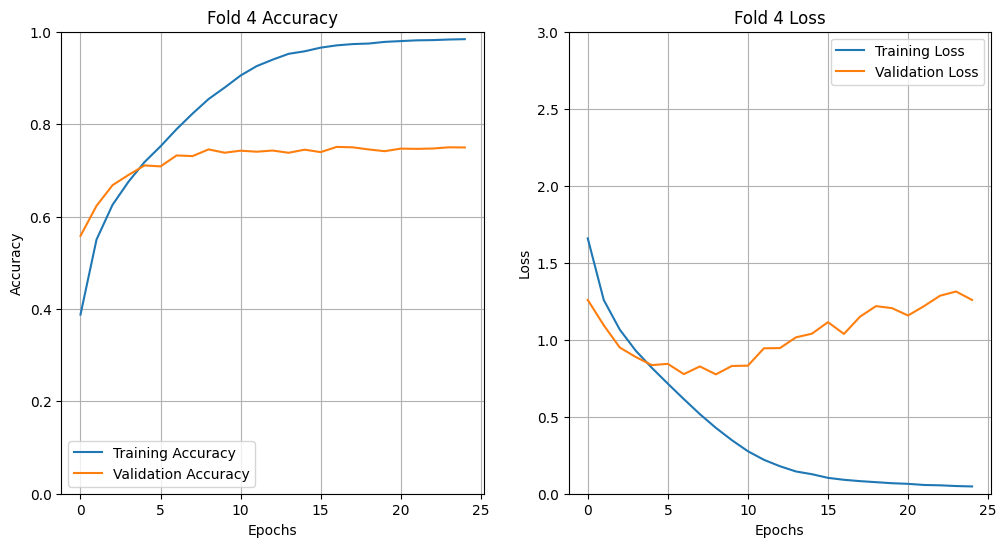

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.75, F1 Score: 0.75, ROC-AUC: 0.96
Test - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Confusion Matrix:
[[763  15  48  26  12   4   9  13  68  42]
 [ 11 865   3   9   2   3   4   1  27  75]
 [ 63   6 586  73  95  52  61  45  12   7]
 [ 17  14  51 583  64 134  58  40  19  20]
 [ 27   4  43  67 703  18  45  79  13   1]
 [ 11   7  37 170  48 639  18  57   7   6]
 [  8   9  27  58  46  17 809   8  10   8]
 [ 17   4  29  39  49  27   4 816   3  12]
 [ 50  34   7  10   4   3   7   6 859  20]
 [ 34  67   4  18   4   4   6  18  28 817]]
Fold 5/5
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.2840 - loss: 1.9220 - val_accuracy:

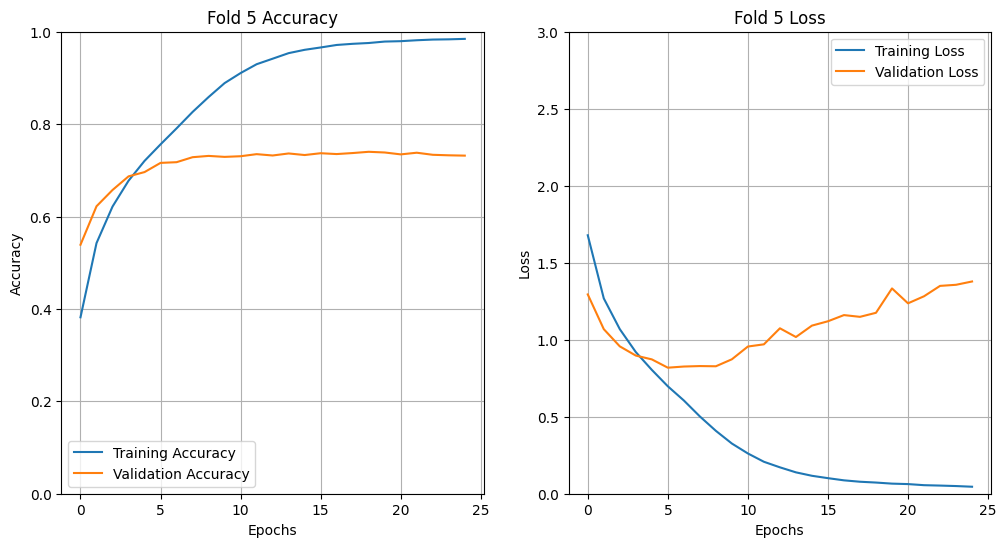

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.96
Test - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.96
Confusion Matrix:
[[738  23  54  21  26   7  15  11  72  33]
 [ 10 856   5  17   2   6   8   2  20  74]
 [ 53   3 563  86  98  72  75  33  10   7]
 [ 14  12  53 567  56 183  67  23  13  12]
 [ 10   4  57  74 708  38  46  50  13   0]
 [  7   7  25 162  50 684  17  37   6   5]
 [  3   3  30  60  48  28 818   4   5   1]
 [  7   2  19  45  70  69   6 771   3   8]
 [ 36  35   9  14   6   9   9   7 846  29]
 [ 26  74   9  26   9  12  10  26  32 776]]

Average Metrics after 5-Fold Cross Validation:
Train Accuracy: 1.00, Validation Accuracy: 0.74, Test Accuracy: 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


# Inception module (simplified with fewer filters)
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)


# Number of folds for cross-validation
n_splits = 5

# KFold Cross-Validation setup
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Prepare the labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in kf.split(train_images):
    print(f"Fold {fold}/{n_splits}")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = train_images[train_index], train_images[val_index]
    train_fold_labels, val_fold_labels = train_labels[train_index], train_labels[val_index]

    # One-hot encode labels for training and validation
    train_labels_onehot = to_categorical(train_fold_labels, num_classes=10)
    val_labels_onehot = to_categorical(val_fold_labels, num_classes=10)

    # Build and compile the model (assuming model is a function that returns a compiled model)
    model = hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_labels_onehot, epochs=25, batch_size=32, validation_data=(val_fold_images, val_labels_onehot))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_labels_onehot, val_fold_images, val_labels_onehot, test_images, test_labels_onehot
    )

    # Store metrics
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Average metrics after all folds
print("\nAverage Metrics after 5-Fold Cross Validation:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}, Validation Accuracy: {np.mean(all_val_accuracies):.2f}, Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1: {np.mean(all_train_f1):.2f}, Validation F1: {np.mean(all_val_f1):.2f}, Test F1: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}, Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}, Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")




# VGG WITH MNIST


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.8325 - loss: 3.4777 - val_accuracy: 0.9854 - val_loss: 0.7763
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9822 - loss: 0.5811 - val_accuracy: 0.9888 - val_loss: 0.2213
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9871 - loss: 0.1841 - val_accuracy: 0.9892 - val_loss: 0.1226
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9888 - loss: 0.1048 - val_accuracy: 0.9918 - val_loss: 0.0811
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9916 - loss: 0.0796 - val_accuracy: 0.9926 - val_loss: 0.0702
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9930 - loss: 0.0625 - val_accuracy: 0.9900 - val_loss: 0.0775
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9943 - loss: 0.0560 - val_accuracy: 0.9906 - val_loss: 0.0698
Epoch 8/25
1719/1719 ━━━━

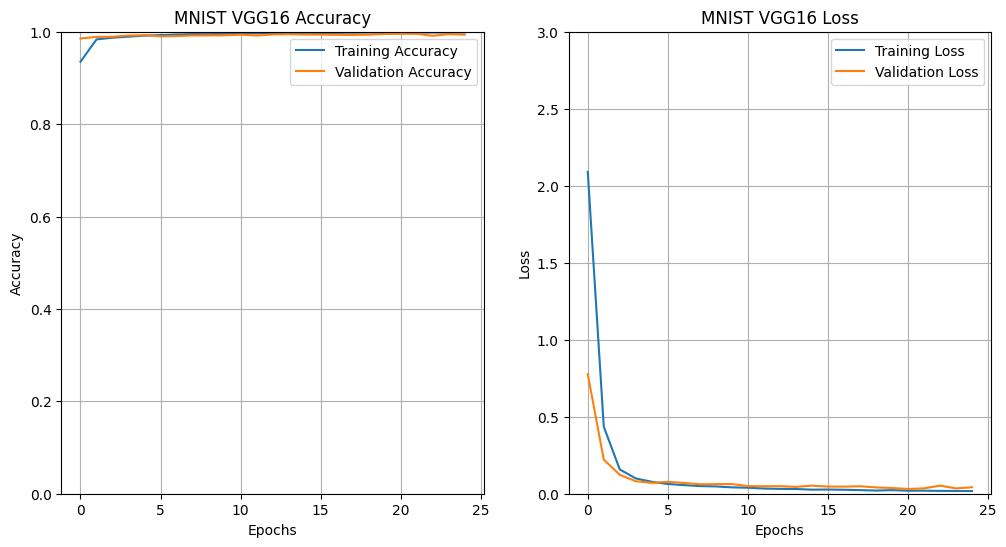

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define VGG16 model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Initialize and train the VGG16 model
mnist_vgg16_model = build_vgg16(input_shape=(28, 28, 1), num_classes=10)
mnist_vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy', metrics=['accuracy'])

mnist_vgg16_history = mnist_vgg16_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for VGG16
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mnist_vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(mnist_vgg16_history.history['loss'], label='Training Loss')
plt.plot(mnist_vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('MNIST VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()
plt.show()


# VGG transfer learning after saving it as pretrained(MNIST)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8260 - loss: 0.5777 - val_accuracy: 0.9425 - val_loss: 0.1859
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9519 - loss: 0.1546 - val_accuracy: 0.9563 - val_loss: 0.1335
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9603 - loss: 0.1205 - val_accuracy: 0.9559 - val_loss: 0.1335
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9661 - loss: 0.1027 - val_accuracy: 0.9588 - val_loss: 0.1266
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9684 - loss: 0.0982 - val_accuracy: 0.9661 - val_loss: 0.1041
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9722 - loss: 0.0874 - val_accuracy: 0.9644 - val_loss: 0.1119
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9733 - loss: 0.0815 - val_accuracy: 0.9691 - val_loss: 0.0963
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9761 - 

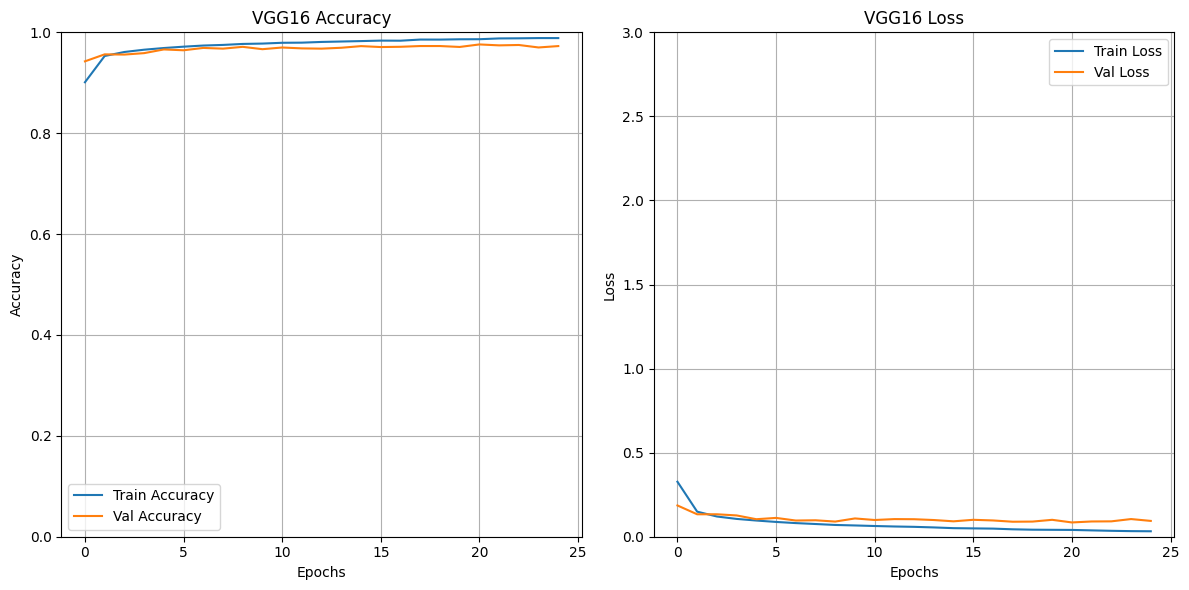

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Evaluation Metrics:
Train - Accuracy: 0.9902, F1: 0.9902, ROC-AUC: 0.9999
Val - Accuracy: 0.9728, F1: 0.9728, ROC-AUC: 0.9994
Test - Accuracy: 0.9743, F1: 0.9744, ROC-AUC: 0.9996


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, roc_auc_score

# Load and preprocess MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

def preprocess_mnist(images):
    images = np.expand_dims(images, -1)
    images = np.repeat(images, 3, -1)  # Convert to 3 channels
    images = tf.image.resize(images, [32, 32])  # VGG16 requires min 32x32
    return images.numpy().astype('float32') / 255.0

train_images = preprocess_mnist(train_images)
test_images = preprocess_mnist(test_images)
train_labels_onehot = to_categorical(train_labels, 10)
test_labels_onehot = to_categorical(test_labels, 10)

# Build VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with validation_split
history = model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Evaluation Function
def evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    # Training metrics
    train_pred = np.argmax(model.predict(x_train), axis=1)
    train_acc = np.mean(train_pred == np.argmax(y_train, axis=1))
    train_f1 = f1_score(np.argmax(y_train, axis=1), train_pred, average='weighted')
    train_roc = roc_auc_score(y_train, model.predict(x_train), multi_class='ovr')

    # Validation metrics
    val_pred = np.argmax(model.predict(x_val), axis=1)
    val_acc = np.mean(val_pred == np.argmax(y_val, axis=1))
    val_f1 = f1_score(np.argmax(y_val, axis=1), val_pred, average='weighted')
    val_roc = roc_auc_score(y_val, model.predict(x_val), multi_class='ovr')

    # Test metrics
    test_pred = np.argmax(model.predict(x_test), axis=1)
    test_acc = np.mean(test_pred == np.argmax(y_test, axis=1))
    test_f1 = f1_score(np.argmax(y_test, axis=1), test_pred, average='weighted')
    test_roc = roc_auc_score(y_test, model.predict(x_test), multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}, ROC-AUC: {train_roc:.4f}")
    print(f"Val - Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}, ROC-AUC: {val_roc:.4f}")
    print(f"Test - Accuracy: {test_acc:.4f}, F1: {test_f1:.4f}, ROC-AUC: {test_roc:.4f}")

# Split validation data from training
val_split = int(0.8 * len(train_images))
x_val, y_val = train_images[val_split:], train_labels_onehot[val_split:]
x_train, y_train = train_images[:val_split], train_labels_onehot[:val_split]

# Evaluate
evaluate_model(model, x_train, y_train, x_val, y_val, test_images, test_labels_onehot)

# RESNET WITH MNIST


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.6854 - loss: 0.9154 - val_accuracy: 0.9618 - val_loss: 0.1439
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9626 - loss: 0.1245 - val_accuracy: 0.9806 - val_loss: 0.0670
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9763 - loss: 0.0783 - val_accuracy: 0.9820 - val_loss: 0.0624
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9818 - loss: 0.0571 - val_accuracy: 0.9798 - val_loss: 0.0652
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9864 - loss: 0.0459 - val_accuracy: 0.9842 - val_loss: 0.0495
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9880 - loss: 0.0386 - val_accuracy: 0.9886 - val_loss: 0.0374
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9912 - loss: 0.0289 - val_accuracy: 0.9880 - val_loss: 0.0387
Epoch 8/25
1719/1719 ━━━━

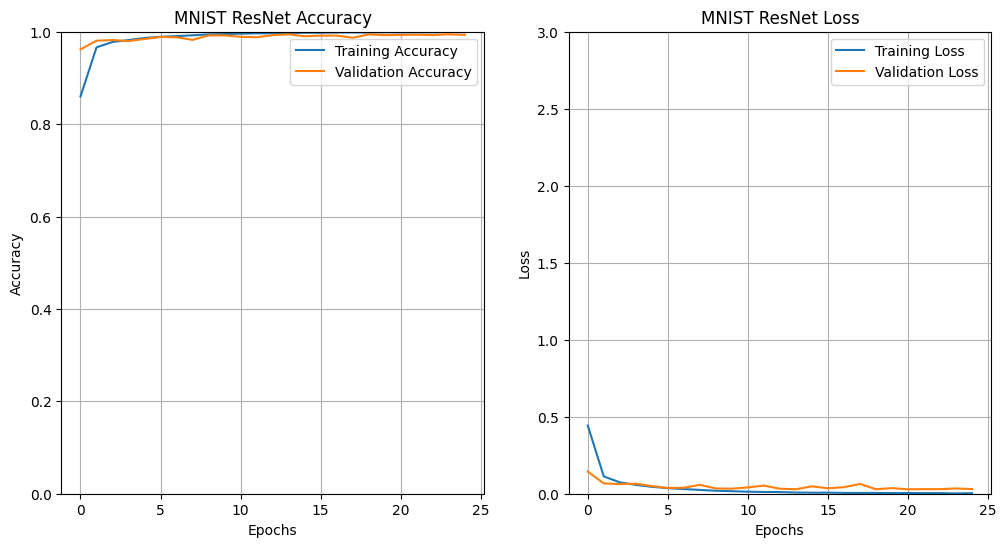

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)


# Initialize and train the ResNet model
mnist_resnet_model = build_resnet(input_shape=(28, 28, 1), num_classes=10)
mnist_resnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                           loss='categorical_crossentropy', metrics=['accuracy'])

mnist_resnet_history = mnist_resnet_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for ResNet
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mnist_resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST ResNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(mnist_resnet_history.history['loss'], label='Training Loss')
plt.plot(mnist_resnet_history.history['val_loss'], label='Validation Loss')
plt.title('MNIST ResNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()
plt.show()


# Resnet transfer learning after saving it as pretrained(MNIST)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.7228 - loss: 0.8565 - val_accuracy: 0.8951 - val_loss: 0.3288
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.8830 - loss: 0.3632 - val_accuracy: 0.8832 - val_loss: 0.3581
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8960 - loss: 0.3182 - val_accuracy: 0.9298 - val_loss: 0.2263
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9112 - loss: 0.2749 - val_accuracy: 0.9158 - val_loss: 0.2587
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.9129 - loss: 0.2654 - val_accuracy: 0.9307 - val_loss: 0.2201
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9239 - loss: 0.2347 - val_accuracy: 0.9262 - val_loss: 0.2204
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9258 - loss: 0.2310 - val_accuracy: 0.9389 - val_loss: 0.1982
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9260 -

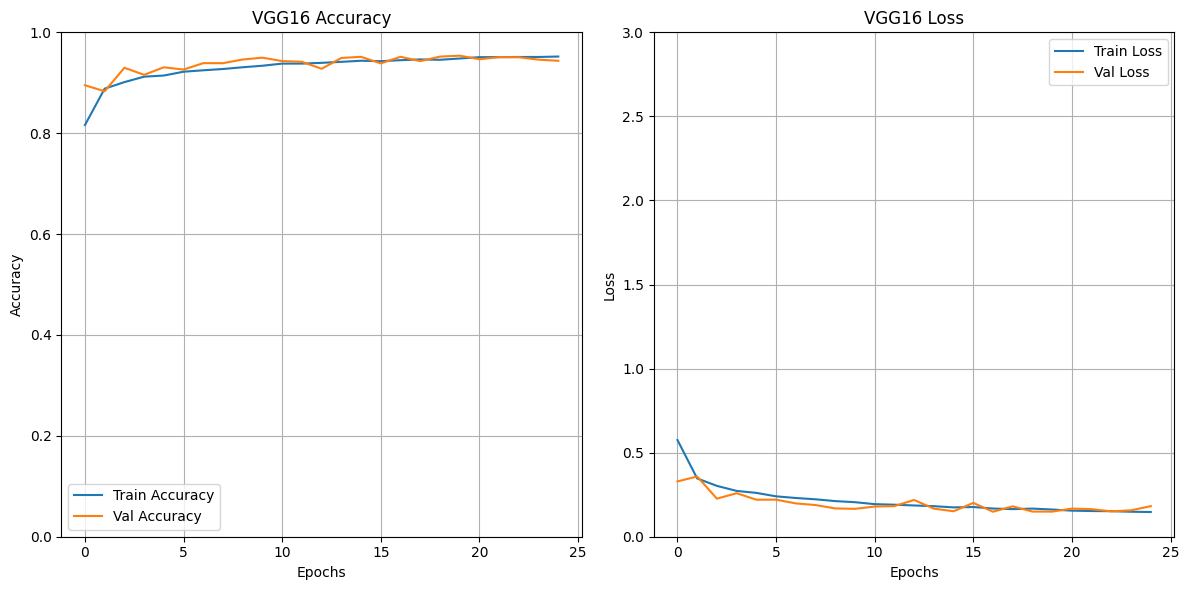

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Evaluation Metrics:
Train - Accuracy: 0.9466, F1: 0.9467, ROC-AUC: 0.9985
Val - Accuracy: 0.9436, F1: 0.9437, ROC-AUC: 0.9980
Test - Accuracy: 0.9460, F1: 0.9462, ROC-AUC: 0.9983


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, roc_auc_score

# Load and preprocess MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

def preprocess_mnist(images):
    images = np.expand_dims(images, -1)
    images = np.repeat(images, 3, -1)  # Convert to 3 channels
    images = tf.image.resize(images, [32, 32])  # VGG16 requires min 32x32
    return images.numpy().astype('float32') / 255.0

train_images = preprocess_mnist(train_images)
test_images = preprocess_mnist(test_images)
train_labels_onehot = to_categorical(train_labels, 10)
test_labels_onehot = to_categorical(test_labels, 10)


# Build ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train (same plotting/evaluation as VGG16)
history = model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Evaluation Function
def evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    # Training metrics
    train_pred = np.argmax(model.predict(x_train), axis=1)
    train_acc = np.mean(train_pred == np.argmax(y_train, axis=1))
    train_f1 = f1_score(np.argmax(y_train, axis=1), train_pred, average='weighted')
    train_roc = roc_auc_score(y_train, model.predict(x_train), multi_class='ovr')

    # Validation metrics
    val_pred = np.argmax(model.predict(x_val), axis=1)
    val_acc = np.mean(val_pred == np.argmax(y_val, axis=1))
    val_f1 = f1_score(np.argmax(y_val, axis=1), val_pred, average='weighted')
    val_roc = roc_auc_score(y_val, model.predict(x_val), multi_class='ovr')

    # Test metrics
    test_pred = np.argmax(model.predict(x_test), axis=1)
    test_acc = np.mean(test_pred == np.argmax(y_test, axis=1))
    test_f1 = f1_score(np.argmax(y_test, axis=1), test_pred, average='weighted')
    test_roc = roc_auc_score(y_test, model.predict(x_test), multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}, ROC-AUC: {train_roc:.4f}")
    print(f"Val - Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}, ROC-AUC: {val_roc:.4f}")
    print(f"Test - Accuracy: {test_acc:.4f}, F1: {test_f1:.4f}, ROC-AUC: {test_roc:.4f}")

# Split validation data from training
val_split = int(0.8 * len(train_images))
x_val, y_val = train_images[val_split:], train_labels_onehot[val_split:]
x_train, y_train = train_images[:val_split], train_labels_onehot[:val_split]

# Evaluate
evaluate_model(model, x_train, y_train, x_val, y_val, test_images, test_labels_onehot)

# GOOGLENETT WITH MNIST


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.5436 - loss: 1.3199 - val_accuracy: 0.9160 - val_loss: 0.2729
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9273 - loss: 0.2501 - val_accuracy: 0.9640 - val_loss: 0.1296
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9501 - loss: 0.1700 - val_accuracy: 0.9696 - val_loss: 0.1053
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9586 - loss: 0.1391 - val_accuracy: 0.9740 - val_loss: 0.0838
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9645 - loss: 0.1150 - val_accuracy: 0.9764 - val_loss: 0.0764
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9684 - loss: 0.1036 - val_accuracy: 0.9808 - val_loss: 0.0708
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9742 - loss: 0.0828 - val_accuracy: 0.9812 - val_loss: 0.0607
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9779 - loss: 0.078

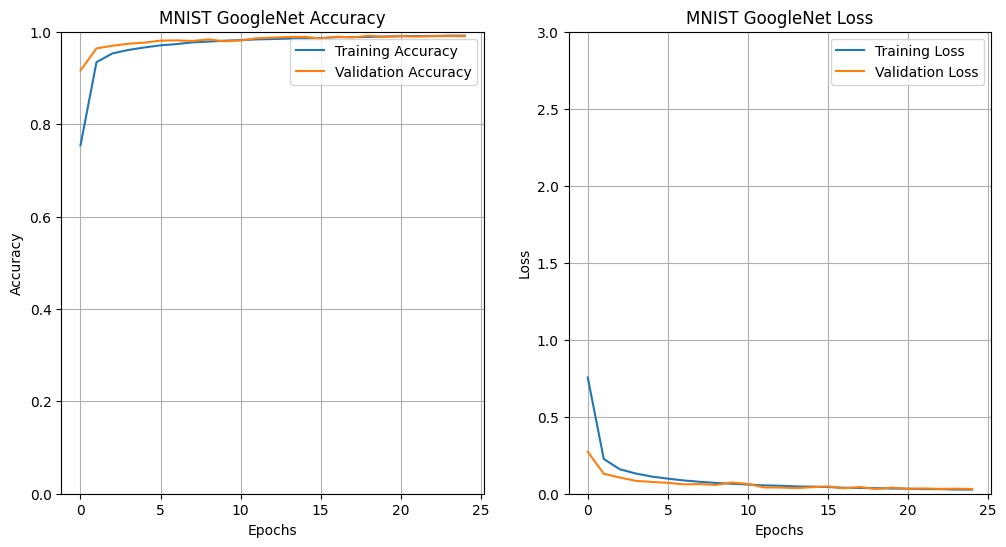

In [ ]:
# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Initialize and train the GoogleNet model
mnist_googlenet_model = build_googlenet(input_shape=(28, 28, 1), num_classes=10)
mnist_googlenet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                              loss='categorical_crossentropy', metrics=['accuracy'])

mnist_googlenet_history = mnist_googlenet_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for GoogleNet
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mnist_googlenet_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_googlenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST GoogleNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(mnist_googlenet_history.history['loss'], label='Training Loss')
plt.plot(mnist_googlenet_history.history['val_loss'], label='Validation Loss')
plt.title('MNIST GoogleNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()
plt.show()


# GoogleNet transfer learning after saving it as pretrained(MNIST)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, roc_auc_score

# Load and preprocess MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

def preprocess_mnist(images):
    images = np.expand_dims(images, -1)
    images = np.repeat(images, 3, -1)  # Convert to 3 channels
    images = tf.image.resize(images, [32, 32])  # VGG16 requires min 32x32
    return images.numpy().astype('float32') / 255.0

train_images = preprocess_mnist(train_images)
test_images = preprocess_mnist(test_images)
train_labels_onehot = to_categorical(train_labels, 10)
test_labels_onehot = to_categorical(test_labels, 10)
# Build ResNet50 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train (same plotting/evaluation as VGG16)
history = model.fit(
    train_images, train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Evaluation Function
def evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    # Training metrics
    train_pred = np.argmax(model.predict(x_train), axis=1)
    train_acc = np.mean(train_pred == np.argmax(y_train, axis=1))
    train_f1 = f1_score(np.argmax(y_train, axis=1), train_pred, average='weighted')
    train_roc = roc_auc_score(y_train, model.predict(x_train), multi_class='ovr')

    # Validation metrics
    val_pred = np.argmax(model.predict(x_val), axis=1)
    val_acc = np.mean(val_pred == np.argmax(y_val, axis=1))
    val_f1 = f1_score(np.argmax(y_val, axis=1), val_pred, average='weighted')
    val_roc = roc_auc_score(y_val, model.predict(x_val), multi_class='ovr')

    # Test metrics
    test_pred = np.argmax(model.predict(x_test), axis=1)
    test_acc = np.mean(test_pred == np.argmax(y_test, axis=1))
    test_f1 = f1_score(np.argmax(y_test, axis=1), test_pred, average='weighted')
    test_roc = roc_auc_score(y_test, model.predict(x_test), multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}, ROC-AUC: {train_roc:.4f}")
    print(f"Val - Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}, ROC-AUC: {val_roc:.4f}")
    print(f"Test - Accuracy: {test_acc:.4f}, F1: {test_f1:.4f}, ROC-AUC: {test_roc:.4f}")

# Split validation data from training
val_split = int(0.8 * len(train_images))
x_val, y_val = train_images[val_split:], train_labels_onehot[val_split:]
x_train, y_train = train_images[:val_split], train_labels_onehot[:val_split]

# Evaluate
evaluate_model(model, x_train, y_train, x_val, y_val, test_images, test_labels_onehot)

NameError: name 'InceptionV3' is not defined

# Setio cnn with mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5429 - loss: 1.4159 - val_accuracy: 0.9374 - val_loss: 0.2049
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.2879 - val_accuracy: 0.9569 - val_loss: 0.1411
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9387 - loss: 0.2042 - val_accuracy: 0.9643 - val_loss: 0.1085
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9537 - loss: 0.1556 - val_accuracy: 0.9707 - val_loss: 0.0950
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9619 - loss: 0.1337 - val_accuracy: 0.9741 - val_loss: 0.0822
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9668 - loss: 0.1174 - val_accuracy: 0.9765 - val_loss: 0.0744
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9690 - loss: 0.1050 - val_accuracy: 0.9761 - val_loss: 0.0728
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9717 - loss: 0.0951 - 

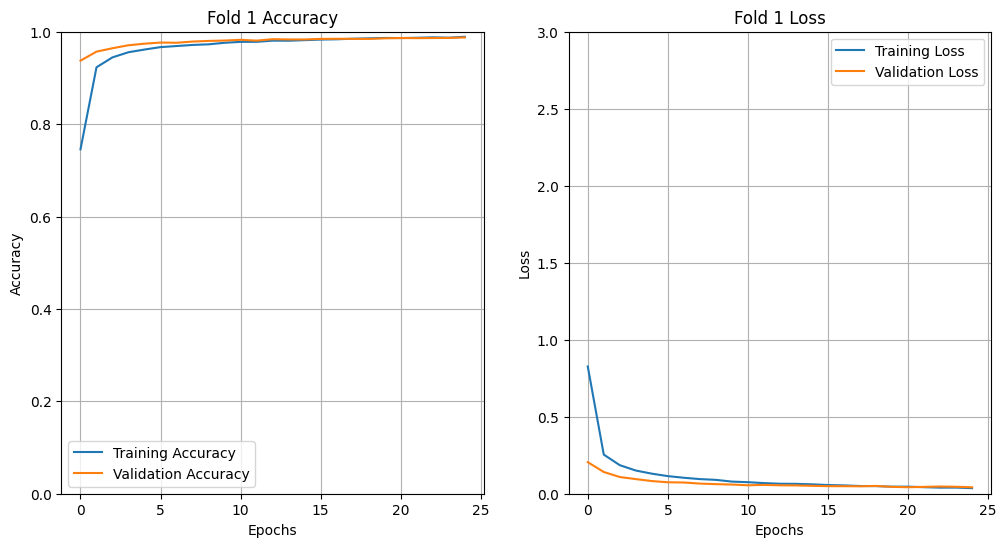

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 976    0    0    0    0    1    1    1    1    0]
 [   0 1130    0    2    0    0    1    0    2    0]
 [   2    0 1020    2    0    0    0    7    1    0]
 [   0    0    0 1006    0    1    0    3    0    0]
 [   0    0    2    0  971    0    1    0    1    7]
 [   1    0    1    4    0  881    2    0    1    2]
 [   3    2    0    1    2    4  943    0    3    0]
 [   0    1    3    3    0    0    0 1019    0    2]
 [   1    0    0    5    0    1    0    2  961    4]
 [   2    0    0    2    4    1    0    2    1  997]]
Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5409 - loss: 1.4167 - val_accuracy: 0.9458 - val_loss: 0.1894
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9248 - loss: 0.2544 - val_accuracy: 0.9613 - val_loss: 0.1233
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9451 - loss: 0.1856 - val_accuracy: 0.9695 - val_loss: 0.0978
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9554 - loss: 0.1476 - val_accuracy: 0.9739 - val_loss: 0.0851
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9629 - loss: 0.1226 - val_accuracy: 0.9743 - val_loss: 0.0762
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9684 - loss: 0.1084 - val_accuracy: 0.9789 - val_loss: 0.0647
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9688 - loss: 0.0984 - val_accuracy: 0.9810 - val_loss: 0.0596
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.0892 - 

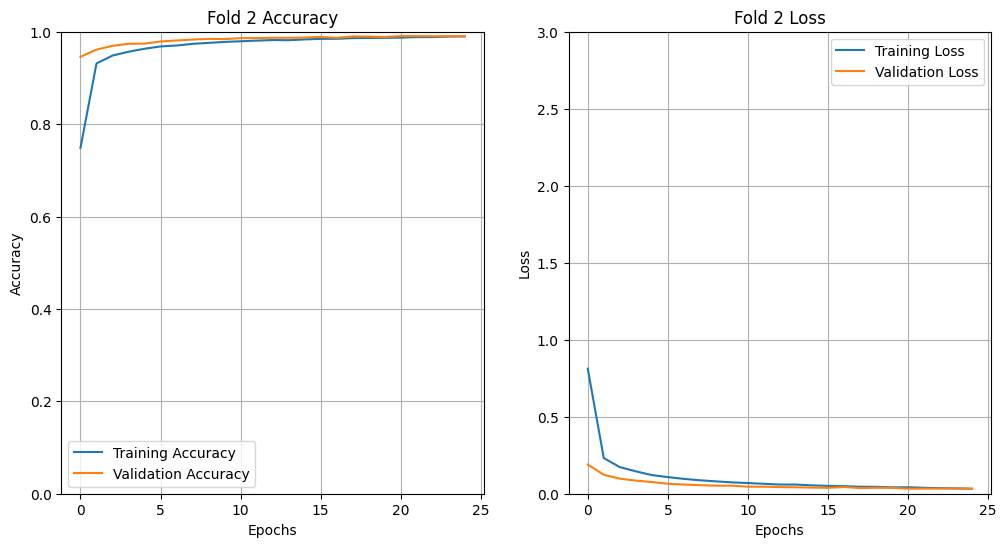

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1    1 1027    1    0    0    0    2    0    0]
 [   0    0    0 1008    0    2    0    0    0    0]
 [   0    0    0    0  971    0    1    1    0    9]
 [   1    0    0    5    0  882    1    0    1    2]
 [   5    2    0    1    1    3  945    0    1    0]
 [   0    2    3    1    0    0    0 1020    1    1]
 [   3    0    1    4    1    1    0    2  957    5]
 [   0    2    0    0    3    1    0    5    0  998]]
Fold 3/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5459 - loss: 1.3883 - val_accuracy: 0.9395 - val_loss: 0.2109
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9203 - loss: 0.2625 - val_accuracy: 0.9599 - val_loss: 0.1390
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9429 - loss: 0.1941 - val_accuracy: 0.9649 - val_loss: 0.1154
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9525 - loss: 0.1588 - val_accuracy: 0.9710 - val_loss: 0.0980
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9594 - loss: 0.1403 - val_accuracy: 0.9742 - val_loss: 0.0848
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9639 - loss: 0.1222 - val_accuracy: 0.9769 - val_loss: 0.0769
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9678 - loss: 0.1054 - val_accuracy: 0.9782 - val_loss: 0.0735
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9706 - loss: 0.0980 - 

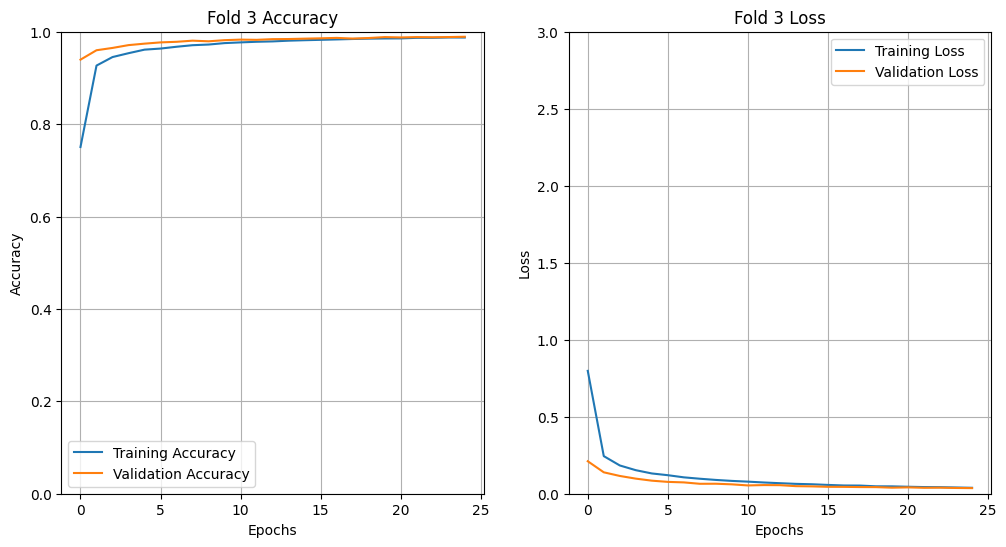

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 973    0    2    0    0    0    3    1    1    0]
 [   0 1130    1    1    0    1    0    1    1    0]
 [   2    0 1026    0    1    0    0    3    0    0]
 [   0    0    1 1002    0    3    0    2    2    0]
 [   1    0    0    0  979    0    0    0    0    2]
 [   1    0    2    6    0  880    1    0    0    2]
 [   3    2    0    0    5    3  944    0    1    0]
 [   0    2    3    1    0    0    0 1019    2    1]
 [   2    0    2    5    1    1    0    2  957    4]
 [   0    2    0    3    7    3    0    6    1  987]]
Fold 4/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5462 - loss: 1.4024 - val_accuracy: 0.9475 - val_loss: 0.1890
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9231 - loss: 0.2627 - val_accuracy: 0.9649 - val_loss: 0.1166
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9485 - loss: 0.1755 - val_accuracy: 0.9742 - val_loss: 0.0892
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9560 - loss: 0.1467 - val_accuracy: 0.9777 - val_loss: 0.0739
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9626 - loss: 0.1265 - val_accuracy: 0.9797 - val_loss: 0.0680
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.1113 - val_accuracy: 0.9817 - val_loss: 0.0604
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9690 - loss: 0.1012 - val_accuracy: 0.9823 - val_loss: 0.0564
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9746 - loss: 0.0884 - 

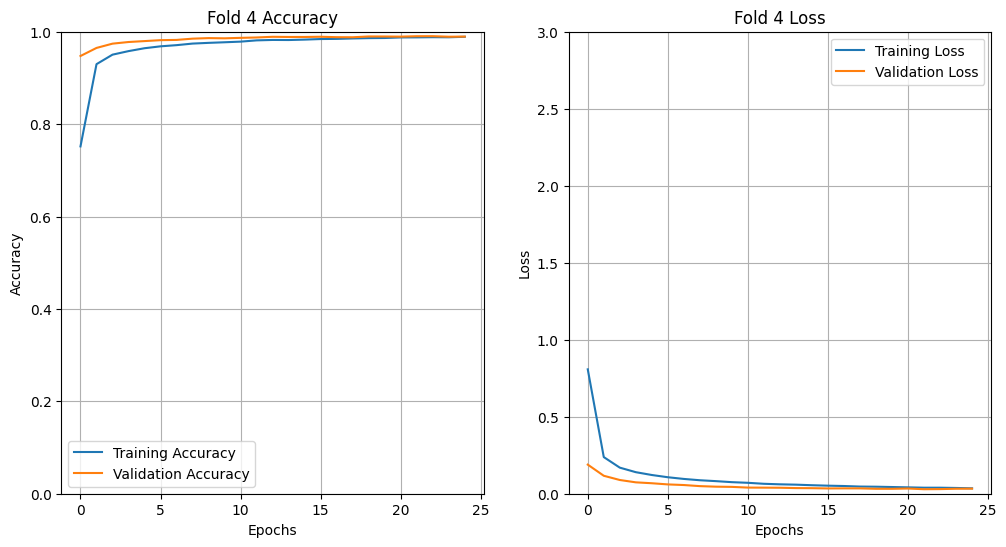

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 976    0    0    0    0    1    1    1    1    0]
 [   0 1132    1    0    0    0    0    2    0    0]
 [   1    2 1027    0    0    0    0    2    0    0]
 [   0    0    1 1004    0    3    0    2    0    0]
 [   0    0    1    0  980    0    0    0    0    1]
 [   1    0    0    6    0  881    3    1    0    0]
 [   4    3    0    0    1    4  946    0    0    0]
 [   0    2    5    0    0    0    0 1020    1    0]
 [   5    1    3    3    1    2    1    2  952    4]
 [   3    3    0    1    9    2    0   10    1  980]]
Fold 5/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5407 - loss: 1.3902 - val_accuracy: 0.9363 - val_loss: 0.2102
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9203 - loss: 0.2803 - val_accuracy: 0.9592 - val_loss: 0.1314
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9439 - loss: 0.1890 - val_accuracy: 0.9669 - val_loss: 0.1082
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9555 - loss: 0.1538 - val_accuracy: 0.9731 - val_loss: 0.0893
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9631 - loss: 0.1237 - val_accuracy: 0.9773 - val_loss: 0.0808
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9665 - loss: 0.1129 - val_accuracy: 0.9765 - val_loss: 0.0799
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9693 - loss: 0.1003 - val_accuracy: 0.9788 - val_loss: 0.0696
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9720 - loss: 0.0931 - 

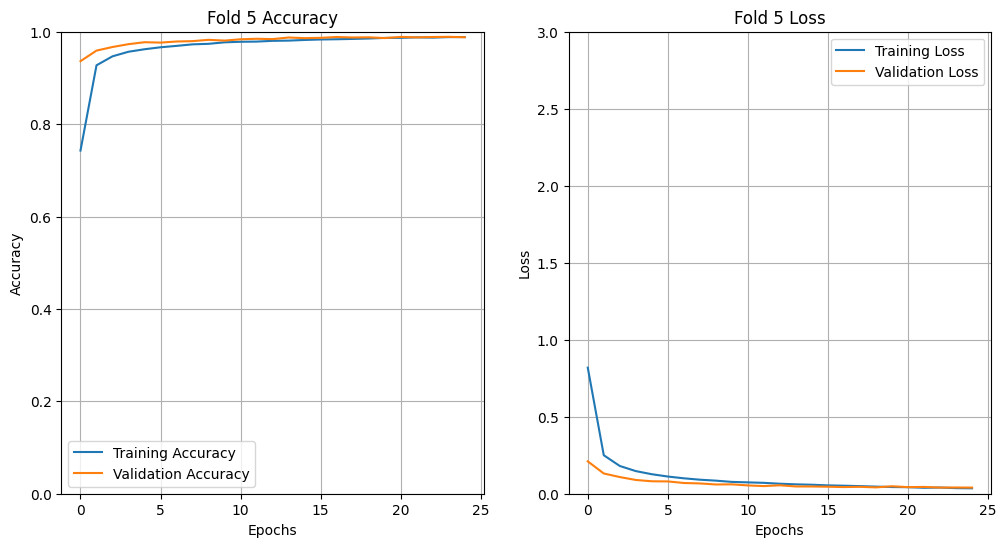

1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluation Metrics:
Train - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Validation - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Test - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Confusion Matrix:
[[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1131    2    0    0    0    1    1    0    0]
 [   1    0 1028    1    0    0    0    1    1    0]
 [   0    0    1 1002    0    3    0    0    3    1]
 [   0    0    1    0  975    0    1    0    1    4]
 [   2    0    0    3    0  883    1    1    1    1]
 [   4    3    1    0    2    1  945    0    2    0]
 [   0    2    5    1    0    0    0 1016    3    1]
 [   1    0    1    0    1    0    0    0  970    1]
 [   0    2    1    2    6    1    0    2    5  990]]

Average Metri

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Prepare labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# KFold Cross-Validation setup
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in kf.split(mnist_train_images):
    print(f"Fold {fold}/{n_splits}")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = mnist_train_images[train_index], mnist_train_images[val_index]
    train_fold_labels, val_fold_labels = mnist_train_labels_onehot[train_index], mnist_train_labels_onehot[val_index]

    # Build and compile the model
    model = create_setio_2d_cnn(input_shape=(28, 28, 1), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_fold_labels, epochs=25, batch_size=32, validation_data=(val_fold_images, val_fold_labels))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_fold_labels, val_fold_images, val_fold_labels, mnist_test_images, mnist_test_labels_onehot
    )

    # Store metrics
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Average metrics after all folds
print("\nAverage Metrics after 5-Fold Cross Validation:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}, Validation Accuracy: {np.mean(all_val_accuracies):.2f}, Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1: {np.mean(all_train_f1):.2f}, Validation F1: {np.mean(all_val_f1):.2f}, Test F1: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}, Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}, Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# Fusion 1 vgg resnet cifar

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.2025 - loss: 3.9088 - val_accuracy: 0.3634 - val_loss: 1.6507
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - accuracy: 0.3830 - loss: 1.6141 - val_accuracy: 0.4195 - val_loss: 1.5100
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.4810 - loss: 1.3913 - val_accuracy: 0.5286 - val_loss: 1.3055
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.5477 - loss: 1.2519 - val_accuracy: 0.5433 - val_loss: 1.2591
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.6004 - loss: 1.1247 - val_accuracy: 0.6201 - val_loss: 1.0711
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.6375 - loss: 1.0279 - val_accuracy: 0.6467 - val_loss: 1.0211
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.6751 - loss: 0.9321 - val_accuracy: 0.6722 - val_loss: 0.9611
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.7063 -

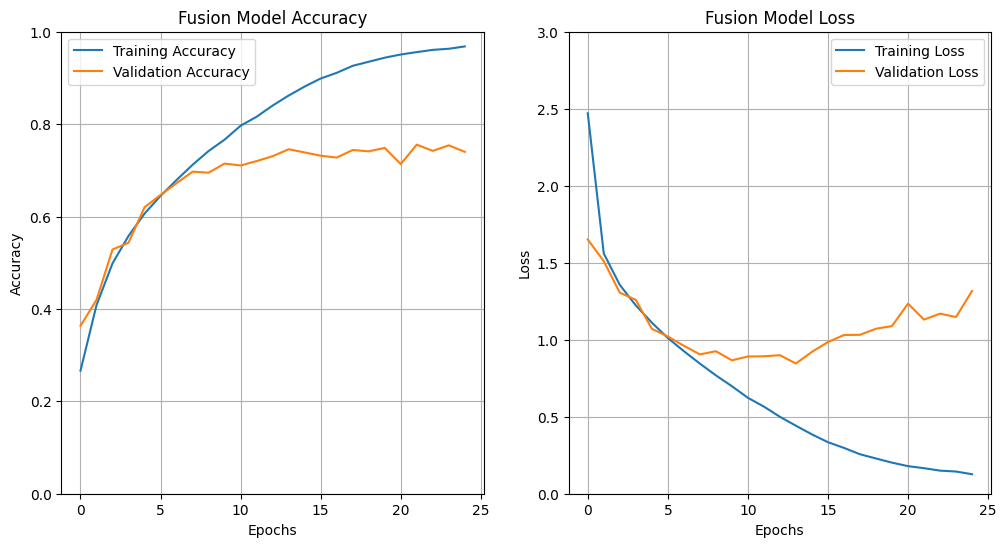

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Evaluation Metrics:
Train - Accuracy: 0.97, F1 Score: 0.97, ROC-AUC: 1.00
Validation - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Test - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    resnet_model = build_resnet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_resnet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    resnet_features = resnet_model(input_resnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, resnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_resnet], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


# Fusion 1 vgg googlenet cifar

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 33ms/step - accuracy: 0.1699 - loss: 3.9554 - val_accuracy: 0.2781 - val_loss: 1.8435
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 25ms/step - accuracy: 0.2936 - loss: 1.7968 - val_accuracy: 0.3588 - val_loss: 1.6694
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.3732 - loss: 1.6171 - val_accuracy: 0.4522 - val_loss: 1.4652
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4566 - loss: 1.4594 - val_accuracy: 0.5153 - val_loss: 1.3532
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5206 - loss: 1.3169 - val_accuracy: 0.5552 - val_loss: 1.2935
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.5765 - loss: 1.1915 - val_accuracy: 0.5983 - val_loss: 1.1530
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6224 - loss: 1.0893 - val_accuracy: 0.6250 - val_loss: 1.1011
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.6594 -

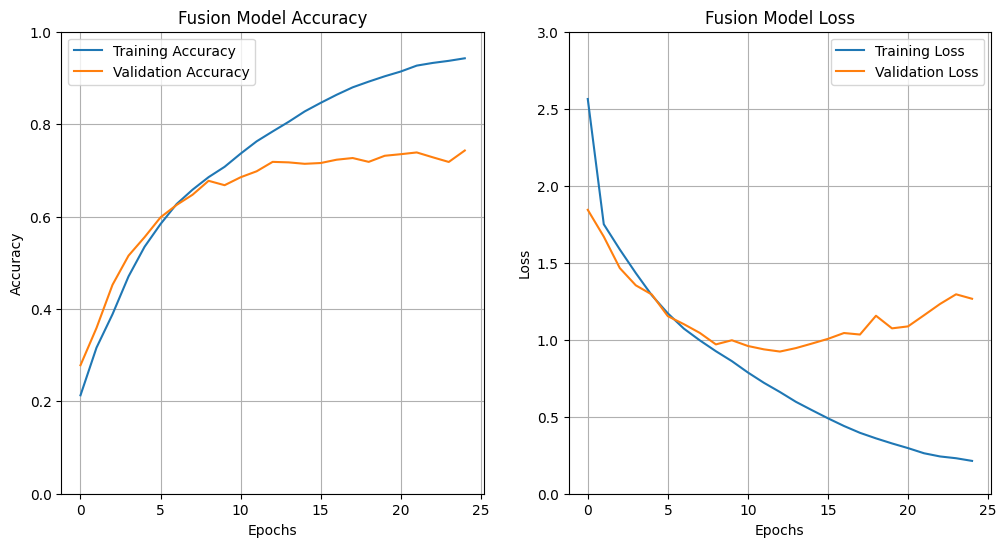

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Evaluation Metrics:
Train - Accuracy: 0.97, F1 Score: 0.97, ROC-AUC: 1.00
Validation - Accuracy: 0.74, F1 Score: 0.74, ROC-AUC: 0.96
Test - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.95


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + ResNet)
def build_fusion_model_google_vgg(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_google_vgg((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


# Fusion 1 resnet googlenet cifar

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - accuracy: 0.1992 - loss: 2.0832 - val_accuracy: 0.3342 - val_loss: 1.7263
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3517 - loss: 1.6679 - val_accuracy: 0.3701 - val_loss: 1.6237
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4099 - loss: 1.5408 - val_accuracy: 0.4451 - val_loss: 1.4521
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4569 - loss: 1.4121 - val_accuracy: 0.4847 - val_loss: 1.3605
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4972 - loss: 1.3197 - val_accuracy: 0.4985 - val_loss: 1.3120
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.5286 - loss: 1.2433 - val_accuracy: 0.5373 - val_loss: 1.2273
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.5531 - loss: 1.1865 - val_accuracy: 0.5488 - val_loss: 1.2233
Epoch 8/25
1250/1250 ━━

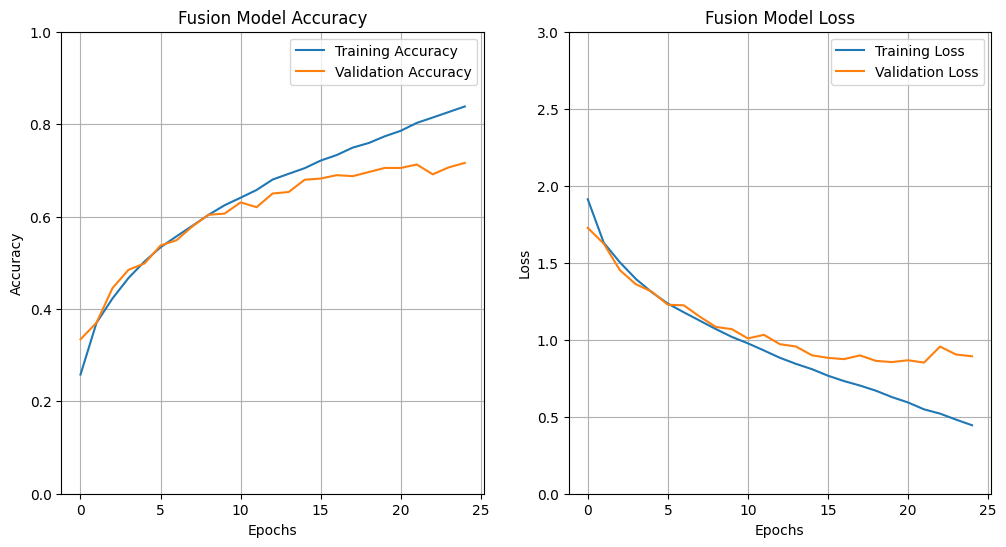

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 0.86, F1 Score: 0.85, ROC-AUC: 0.99
Validation - Accuracy: 0.86, F1 Score: 0.86, ROC-AUC: 0.99
Test - Accuracy: 0.71, F1 Score: 0.70, ROC-AUC: 0.96


In [ ]:
from tensorflow.keras import layers, models, Input, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define Fusion Model (GoogleNet + ResNet)
def build_fusion_model_google_resnet(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([resnet_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_google_resnet((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)

# Fusion 1 custom setio cifar

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


# Inception module (simplified with fewer filters)
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model


# Define Fusion Model (Hybrid GoogleNet + SetIO 2D CNN)
def build_fusion_model_hybrid_setio(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two models (Hybrid GoogleNet + SetIO 2D CNN)
    hybrid_googlenet_model = hybrid_googlenet_vgg16(input_shape, num_classes)
    setio_2d_cnn_model = create_setio_2d_cnn(input_shape, num_classes)

    # Define inputs
    input_hybrid_googlenet = layers.Input(shape=input_shape)
    input_setio_2d_cnn = layers.Input(shape=input_shape)

    # Extract features from both models
    hybrid_googlenet_features = hybrid_googlenet_model(input_hybrid_googlenet)
    setio_2d_cnn_features = setio_2d_cnn_model(input_setio_2d_cnn)

    # Concatenate the features from both models
    combined_features = layers.Concatenate()([hybrid_googlenet_features, setio_2d_cnn_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final fusion model
    fusion_model = models.Model(inputs=[input_hybrid_googlenet, input_setio_2d_cnn], outputs=output)
    return fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)



# Prepare labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# KFold Cross-Validation setup
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in kf.split(train_images):
    print(f"Fold {fold}/{n_splits}")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = train_images[train_index], train_images[val_index]
    train_fold_labels, val_fold_labels = train_labels[train_index], train_labels[val_index]

    # One-hot encode labels for training and validation
    train_labels_onehot = to_categorical(train_fold_labels, num_classes=10)
    val_labels_onehot = to_categorical(val_fold_labels, num_classes=10)

    # Build and compile the model
    model = build_fusion_model_hybrid_setio(input_shape=(32, 32, 3), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_labels_onehot, epochs=25, batch_size=32, validation_data=(val_fold_images, val_labels_onehot))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_labels_onehot, val_fold_images, val_labels_onehot, test_images, test_labels_onehot
    )

    # Store metrics
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Average metrics after all folds
print("\nAverage Metrics after 5-Fold Cross Validation:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}, Validation Accuracy: {np.mean(all_val_accuracies):.2f}, Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1: {np.mean(all_train_f1):.2f}, Validation F1: {np.mean(all_val_f1):.2f}, Test F1: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}, Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}, Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# Fusion 1 vgg resnet mnist

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 71s 34ms/step - accuracy: 0.5512 - loss: 2.7184 - val_accuracy: 0.9676 - val_loss: 0.2369
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9671 - loss: 0.2022 - val_accuracy: 0.9772 - val_loss: 0.1474
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9793 - loss: 0.1278 - val_accuracy: 0.9844 - val_loss: 0.1014
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9866 - loss: 0.0909 - val_accuracy: 0.9876 - val_loss: 0.0845
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9894 - loss: 0.0718 - val_accuracy: 0.9908 - val_loss: 0.0676
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9915 - loss: 0.0591 - val_accuracy: 0.9854 - val_loss: 0.0841
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9930 - loss: 0.0520 - val_accuracy: 0.9852 - val_loss: 0.0887
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9939 -

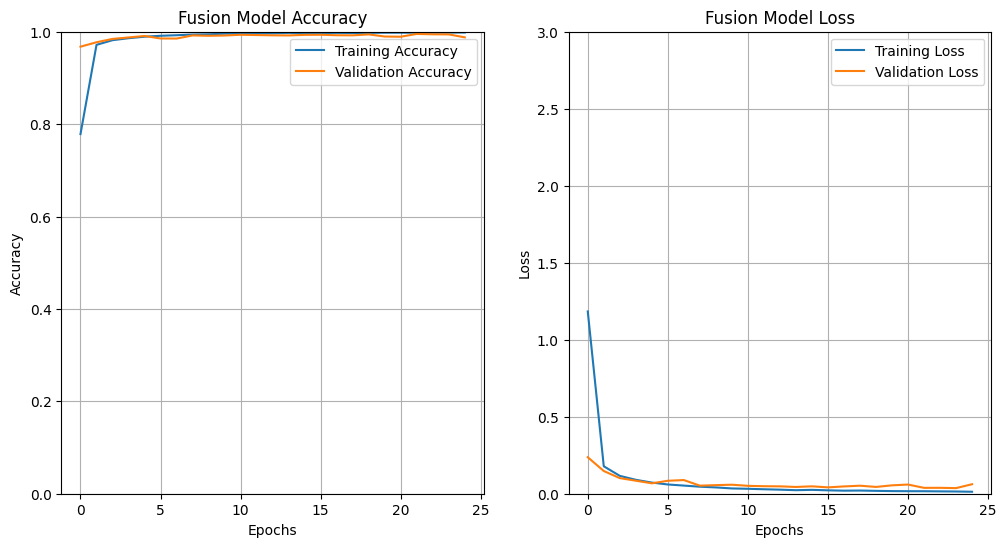

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import numpy as np
import matplotlib.pyplot as plt



# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    resnet_model = build_resnet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_resnet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    resnet_features = resnet_model(input_resnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, resnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_resnet], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()


def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)




#Fusion 1 vgg googlnet mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 71s 29ms/step - accuracy: 0.4782 - loss: 2.8567 - val_accuracy: 0.9602 - val_loss: 0.2362
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 0.9613 - loss: 0.2095 - val_accuracy: 0.9764 - val_loss: 0.1359
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9769 - loss: 0.1229 - val_accuracy: 0.9836 - val_loss: 0.0914
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9842 - loss: 0.0875 - val_accuracy: 0.9874 - val_loss: 0.0709
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9877 - loss: 0.0684 - val_accuracy: 0.9912 - val_loss: 0.0614
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9895 - loss: 0.0609 - val_accuracy: 0.9876 - val_loss: 0.0739
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9914 - loss: 0.0506 - val_accuracy: 0.9898 - val_loss: 0.0563
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9932 -

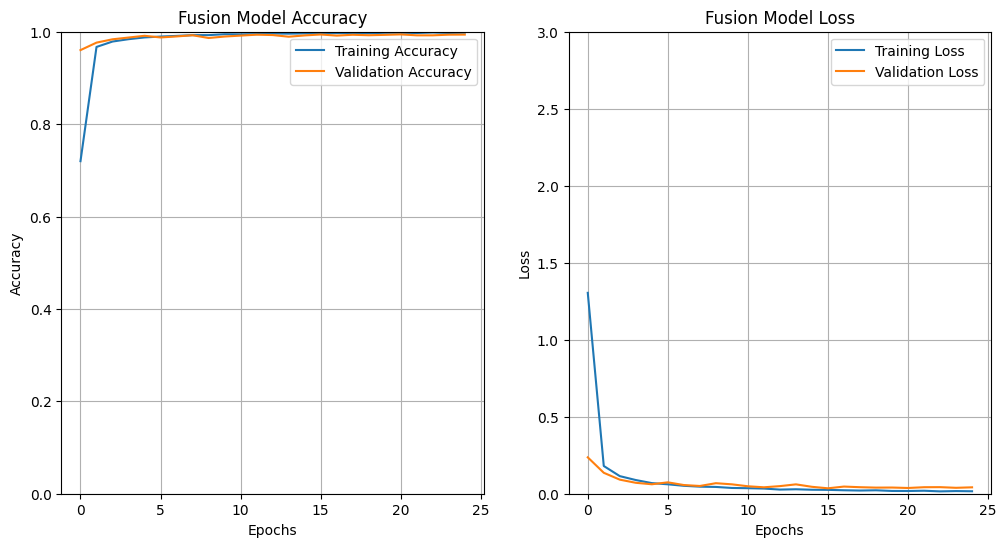

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogLeNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()




def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)



# Fusion 1 googlenet resnet mnist

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 0.4044 - loss: 1.5550 - val_accuracy: 0.8284 - val_loss: 0.5331
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.8690 - loss: 0.4289 - val_accuracy: 0.9406 - val_loss: 0.2164
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9390 - loss: 0.2183 - val_accuracy: 0.9632 - val_loss: 0.1320
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9550 - loss: 0.1558 - val_accuracy: 0.9680 - val_loss: 0.1086
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9673 - loss: 0.1145 - val_accuracy: 0.9726 - val_loss: 0.0898
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9723 - loss: 0.0970 - val_accuracy: 0.9730 - val_loss: 0.0911
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9762 - loss: 0.0807 - val_accuracy: 0.9728 - val_loss: 0.0922
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9796 -

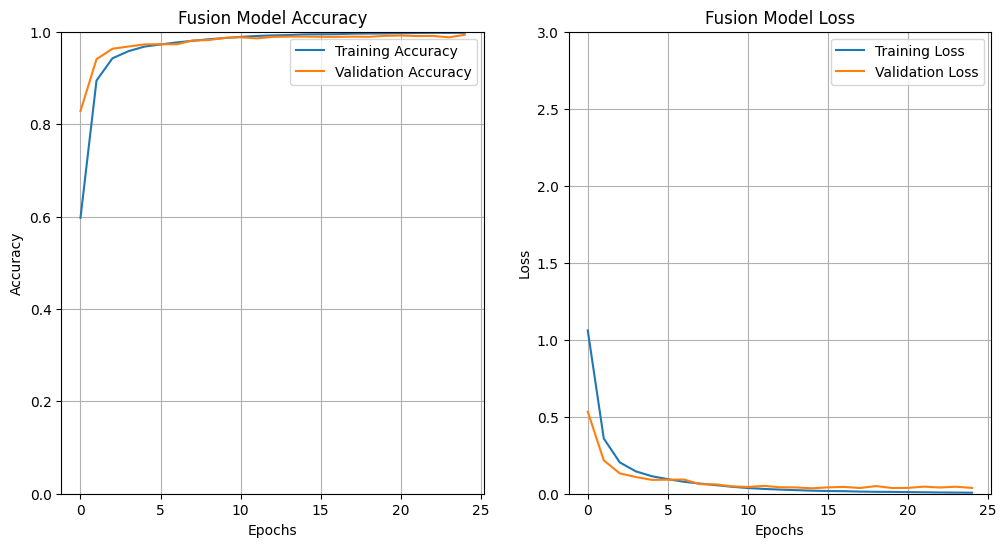

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Fusion Model (ResNet + GoogLeNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([resnet_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()




def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)



# FUSION 2 vgg resnet cifar

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - accuracy: 0.2134 - loss: 4.1311 - val_accuracy: 0.3548 - val_loss: 2.0570
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 31ms/step - accuracy: 0.3806 - loss: 2.0116 - val_accuracy: 0.4352 - val_loss: 1.9188
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.4479 - loss: 1.8980 - val_accuracy: 0.4959 - val_loss: 1.8288
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.4964 - loss: 1.8264 - val_accuracy: 0.5296 - val_loss: 1.7714
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.5361 - loss: 1.7621 - val_accuracy: 0.5761 - val_loss: 1.7064
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.5750 - loss: 1.7034 - val_accuracy: 0.5784 - val_loss: 1.7078
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.6034 - loss: 1.6603 - val_accuracy: 0.6260 - val_loss: 1.6241
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.6289 -

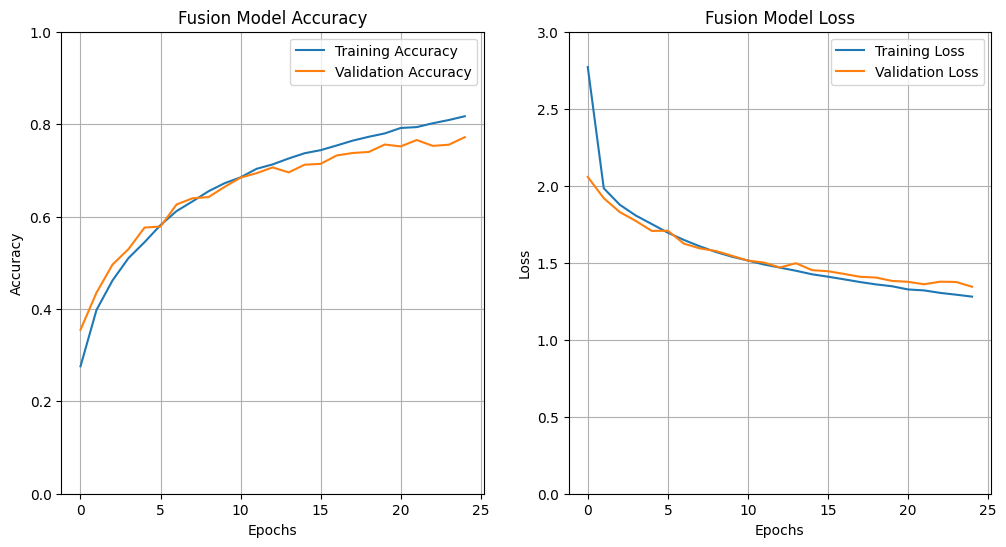

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Evaluation Metrics:
Train - Accuracy: 0.84, F1 Score: 0.83, ROC-AUC: 0.97
Validation - Accuracy: 0.77, F1 Score: 0.77, ROC-AUC: 0.95
Test - Accuracy: 0.77, F1 Score: 0.76, ROC-AUC: 0.95


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_committee_fusion_model(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two models (ResNet + VGG16)
    resnet_model = build_resnet(input_shape, num_classes)
    vgg16_model = build_vgg16(input_shape, num_classes)

    # Define inputs
    input_resnet = layers.Input(shape=input_shape)
    input_vgg16 = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    resnet_output = resnet_model(input_resnet)
    vgg16_output = vgg16_model(input_vgg16)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_output)
    vgg16_probs = layers.Activation('softmax')(vgg16_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([resnet_probs, vgg16_probs])


    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_resnet, input_vgg16], outputs=combined_probs)
    return committee_fusion_model

# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_committee_fusion_model((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


# Fusion 2 vgg googlenet cifar

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.2005 - loss: 4.1748 - val_accuracy: 0.3024 - val_loss: 2.1056
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 24ms/step - accuracy: 0.3351 - loss: 2.0602 - val_accuracy: 0.3885 - val_loss: 1.9641
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.4062 - loss: 1.9471 - val_accuracy: 0.4689 - val_loss: 1.8586
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.4830 - loss: 1.8564 - val_accuracy: 0.5299 - val_loss: 1.7918
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5389 - loss: 1.7843 - val_accuracy: 0.5605 - val_loss: 1.7543
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.5675 - loss: 1.7452 - val_accuracy: 0.5935 - val_loss: 1.6964
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.5927 - loss: 1.7069 - val_accuracy: 0.6047 - val_loss: 1.6968
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6232 -

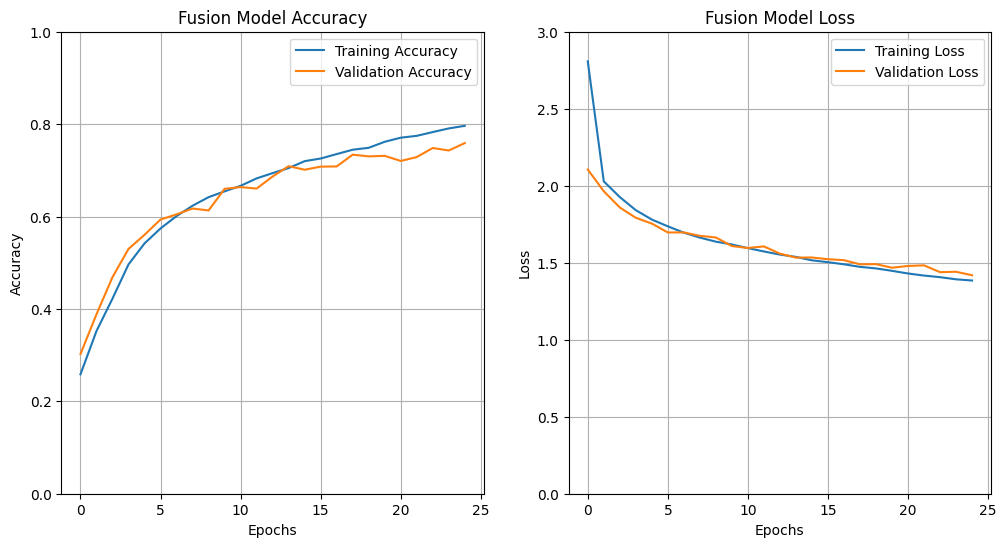

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 0.83, F1 Score: 0.83, ROC-AUC: 0.96
Validation - Accuracy: 0.76, F1 Score: 0.76, ROC-AUC: 0.94
Test - Accuracy: 0.75, F1 Score: 0.75, ROC-AUC: 0.94


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogleNet)
def build_fusion_model_google_vgg(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    vgg_probs = layers.Activation('softmax')(vgg_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([vgg_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=combined_output)
    return fusion_model



# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_google_vgg((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


# Fusion 2 googlenet resnet cifar

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2093 - loss: 2.1887 - val_accuracy: 0.3572 - val_loss: 1.9995
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.3561 - loss: 1.9924 - val_accuracy: 0.3754 - val_loss: 1.9525
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4059 - loss: 1.9133 - val_accuracy: 0.4278 - val_loss: 1.8782
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4336 - loss: 1.8693 - val_accuracy: 0.4566 - val_loss: 1.8331
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4589 - loss: 1.8311 - val_accuracy: 0.4754 - val_loss: 1.7937
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.4738 - loss: 1.7995 - val_accuracy: 0.4898 - val_loss: 1.7750
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4952 - loss: 1.7669 - val_accuracy: 0.4973 - val_loss: 1.7560
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.5041 -

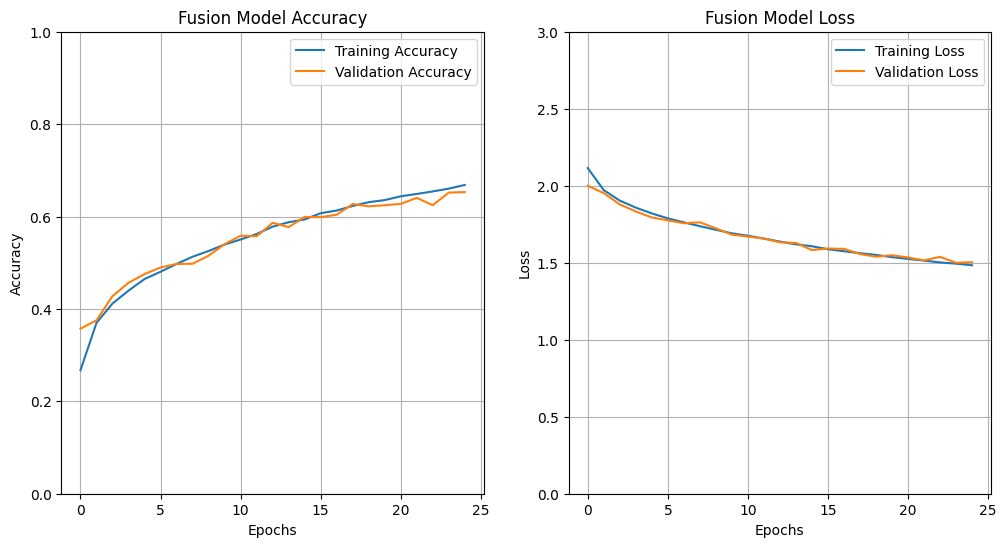

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation Metrics:
Train - Accuracy: 0.68, F1 Score: 0.68, ROC-AUC: 0.93
Validation - Accuracy: 0.68, F1 Score: 0.68, ROC-AUC: 0.93
Test - Accuracy: 0.65, F1 Score: 0.65, ROC-AUC: 0.92


In [ ]:
from tensorflow.keras import layers, models, Input, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define Fusion Model (GoogleNet + ResNet)
def build_fusion_model_google_resnet(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([resnet_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=combined_output)
    return fusion_model


# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_fusion_model_google_resnet((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

# Prepare Labels for ROC-AUC Computation
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

train_labels_onehot = prepare_labels_for_roc_auc(train_labels)
# Split training data into train and validation sets
# Split training data into train and validation sets and one-hot encode
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)

# Fusion 2 custom setio cifar

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model


# Define Fusion Model (Hybrid GoogleNet + SetIO 2D CNN)
def build_fusion_model_hybrid_setio(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two models (Hybrid GoogleNet + SetIO 2D CNN)
    hybrid_googlenet_model = hybrid_googlenet_vgg16(input_shape, num_classes)
    setio_2d_cnn_model = create_setio_2d_cnn(input_shape, num_classes)

    # Define inputs
    input_hybrid_googlenet = layers.Input(shape=input_shape)
    input_setio_2d_cnn = layers.Input(shape=input_shape)

    # Extract features from both models
    hybrid_googlenet_features = hybrid_googlenet_model(input_hybrid_googlenet)
    setio_2d_cnn_features = setio_2d_cnn_model(input_setio_2d_cnn)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([output1, output2])

    # Final classification layer
    output = layers.Dense(num_classes, activation='softmax')(combined_output)

    # Final fusion model
    fusion_model = models.Model(inputs=[input_hybrid_googlenet, input_setio_2d_cnn], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize and train the VGG16 model
mnist_vgg16_model = hybrid_googlenet_vgg16(input_shape=(28, 28, 1), num_classes=10)
mnist_vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy', metrics=['accuracy'])

mnist_vgg16_history = mnist_vgg16_model.fit(
    mnist_train_images, mnist_train_labels_onehot,
    epochs=25, batch_size=32, validation_data=(mnist_val_images, mnist_val_labels_onehot),
    verbose=1
)

# Prepare the labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in KFold(n_splits=5, shuffle=True, random_state=42).split(mnist_train_images):
    print(f"Fold {fold}/5")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = mnist_train_images[train_index], mnist_train_images[val_index]
    train_fold_labels, val_fold_labels = mnist_train_labels_onehot[train_index], mnist_train_labels_onehot[val_index]

    # Build and compile the model
    model = build_fusion_model_hybrid_setio(input_shape=(28, 28, 1), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_fold_images, train_fold_labels, epochs=10, batch_size=64, validation_data=(val_fold_images, val_fold_labels))

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model, train_fold_images, train_fold_labels, val_fold_images, val_fold_labels, mnist_test_images, mnist_test_labels_onehot
    )

    # Store the metrics for each fold
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Calculate and print the average metrics
print(f"\nAverage Metrics over 5 folds:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}")
print(f"Validation Accuracy: {np.mean(all_val_accuracies):.2f}")
print(f"Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1 Score: {np.mean(all_train_f1):.2f}")
print(f"Validation F1 Score: {np.mean(all_val_f1):.2f}")
print(f"Test F1 Score: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}")
print(f"Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}")
print(f"Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")


# fusion 2 vgg resnet mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.6432 - loss: 3.4785 - val_accuracy: 0.9618 - val_loss: 1.2390
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 30ms/step - accuracy: 0.9608 - loss: 1.1843 - val_accuracy: 0.9772 - val_loss: 1.0482
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9729 - loss: 1.0482 - val_accuracy: 0.9772 - val_loss: 0.9470
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9781 - loss: 0.9322 - val_accuracy: 0.9834 - val_loss: 0.8588
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9856 - loss: 0.8591 - val_accuracy: 0.9866 - val_loss: 0.8524
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9876 - loss: 0.8513 - val_accuracy: 0.9874 - val_loss: 0.8452
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9884 - loss: 0.8449 - val_accuracy: 0.9874 - val_loss: 0.8442
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9904 -

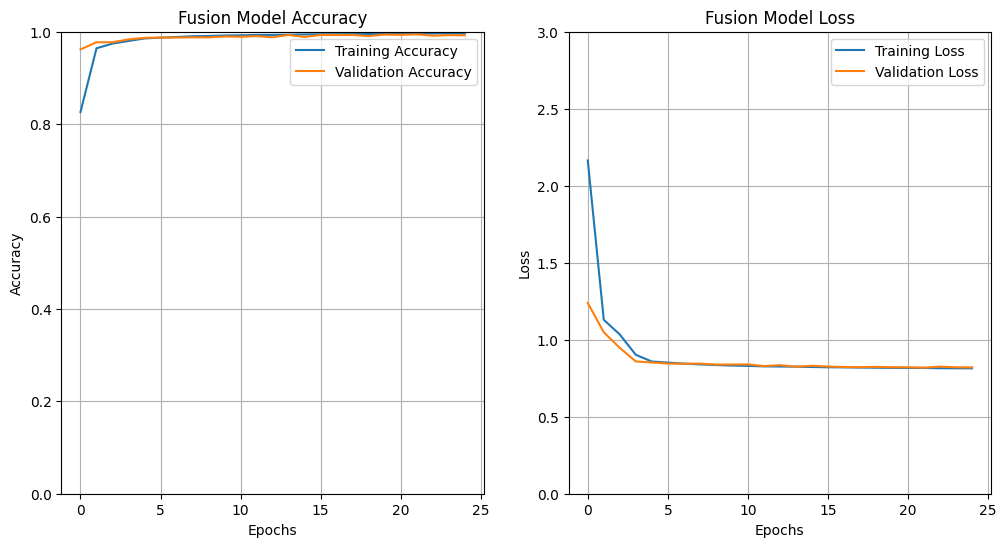

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define VGG16 Model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_committee_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two models (ResNet + VGG16)
    resnet_model = build_resnet(input_shape, num_classes)
    vgg16_model = build_vgg16(input_shape, num_classes)

    # Define inputs
    input_resnet = layers.Input(shape=input_shape)
    input_vgg16 = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    resnet_output = resnet_model(input_resnet)
    vgg16_output = vgg16_model(input_vgg16)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_output)
    vgg16_probs = layers.Activation('softmax')(vgg16_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([resnet_probs, vgg16_probs])

    # Final output with softmax normalization

    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_resnet, input_vgg16], outputs=combined_probs)
    return committee_fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_committee_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()




def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)




# fusion 2 vgg google mnist

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 66s 29ms/step - accuracy: 0.6909 - loss: 3.4454 - val_accuracy: 0.9706 - val_loss: 1.1012
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9668 - loss: 1.0565 - val_accuracy: 0.9778 - val_loss: 0.9319
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9782 - loss: 0.9269 - val_accuracy: 0.9798 - val_loss: 0.8984
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9821 - loss: 0.8966 - val_accuracy: 0.9838 - val_loss: 0.8718
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9837 - loss: 0.8817 - val_accuracy: 0.9854 - val_loss: 0.8723
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9865 - loss: 0.8706 - val_accuracy: 0.9890 - val_loss: 0.8533
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9867 - loss: 0.8629 - val_accuracy: 0.9906 - val_loss: 0.8509
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9890 -

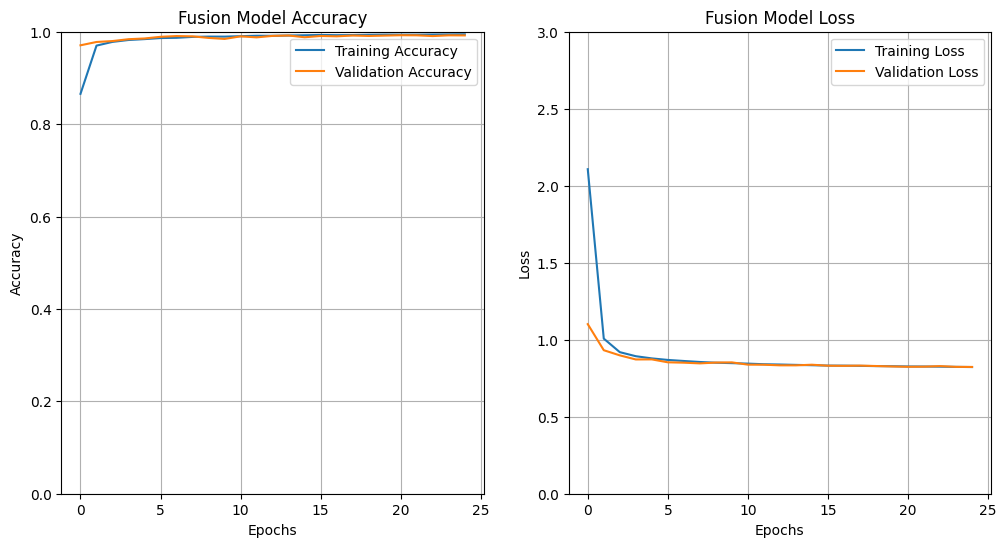

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogLeNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    vgg_probs = layers.Activation('softmax')(vgg_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([vgg_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=combined_output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()



def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)



# fusion 2 googlenet resnet mnist

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.5124 - loss: 1.7826 - val_accuracy: 0.8956 - val_loss: 1.1933
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.8800 - loss: 1.1563 - val_accuracy: 0.9264 - val_loss: 1.0254
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9187 - loss: 1.0442 - val_accuracy: 0.9548 - val_loss: 1.0071
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9416 - loss: 1.0004 - val_accuracy: 0.9708 - val_loss: 0.8705
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9689 - loss: 0.8754 - val_accuracy: 0.9782 - val_loss: 0.8565
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9765 - loss: 0.8590 - val_accuracy: 0.9818 - val_loss: 0.8413
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9807 - loss: 0.8512 - val_accuracy: 0.9812 - val_loss: 0.8395
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9827 -

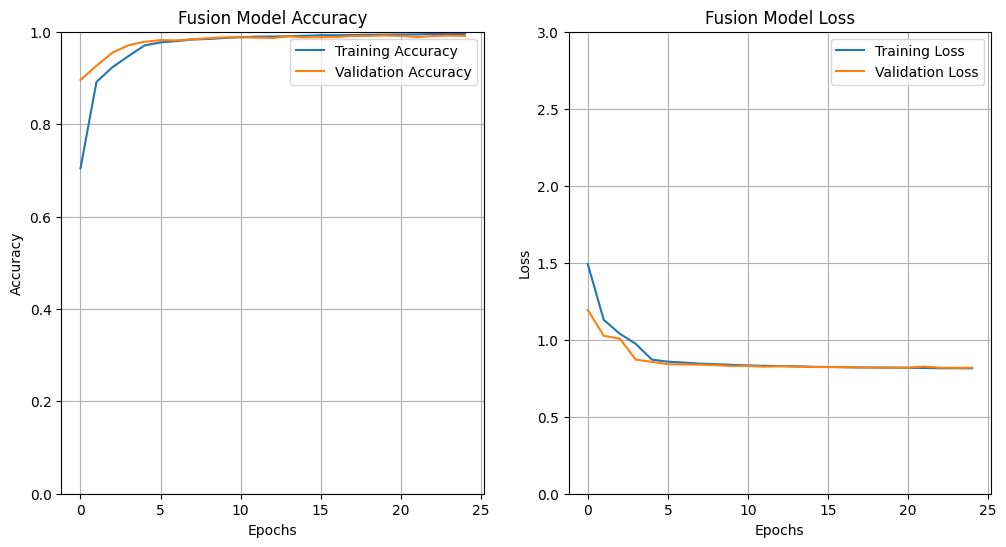

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Fusion Model (ResNet + GoogLeNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
     # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([resnet_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=combined_output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()



def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)


# RESNET TINYIMAGENET

Downloading...


100%|██████████| 248M/248M [00:17<00:00, 14.5MB/s]


Extracting...
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 4

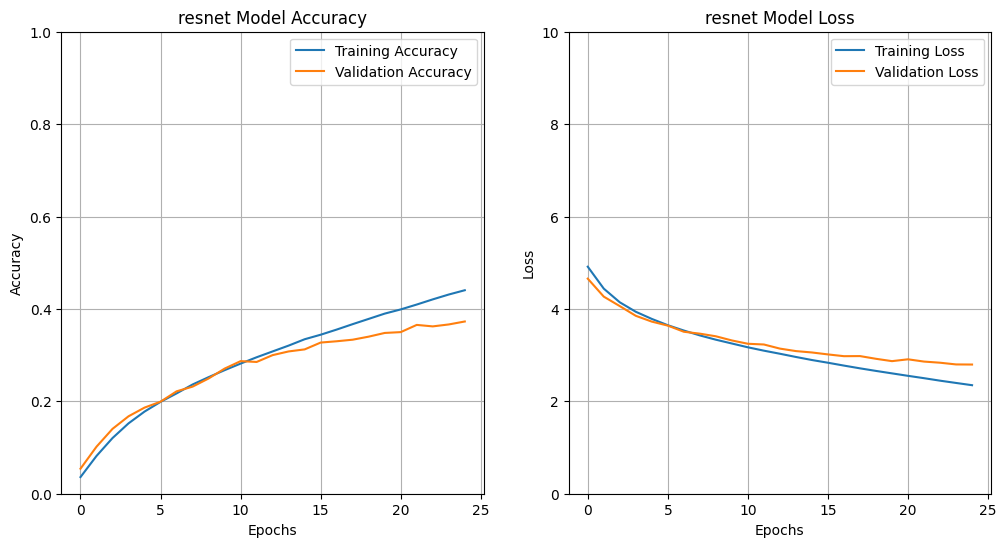

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)


# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize resnet Model
resnet_model = build_resnet((64, 64, 3), 200)
resnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train resnet Model
resnet_history = resnet_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('resnet Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('resnet Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()
plt.grid()

plt.show()



# Vgg16 TinyImagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 166s 52ms/step - accuracy: 0.0154 - loss: 5.1242 - val_accuracy: 0.1136 - val_loss: 4.1613
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.1245 - loss: 4.0405 - val_accuracy: 0.2138 - val_loss: 3.5217
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.2135 - loss: 3.4767 - val_accuracy: 0.2784 - val_loss: 3.2075
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.2861 - loss: 3.0552 - val_accuracy: 0.2984 - val_loss: 3.0246
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.3623 - loss: 2.6709 - val_accuracy: 0.3424 - val_loss: 2.8741
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.4542 - loss: 2.2123 - val_accuracy: 0.3426 - val_loss: 2.8590
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.5618 - loss: 1.6822 - val_accuracy: 0.3488 - val_loss: 2.9647
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 

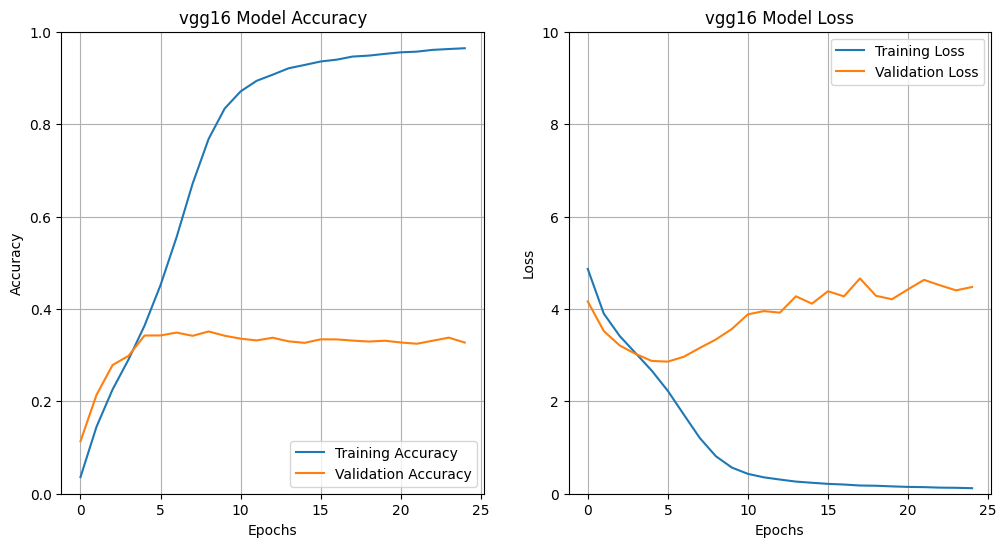

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define VGG16 Architecture
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize vgg16 Model
vgg16_model = build_vgg16((64, 64, 3), 200)
vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train vgg16 Model
vgg16_history = vgg16_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('vgg16 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('vgg16 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()
plt.grid()

plt.show()



#RegnetX TinyImagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

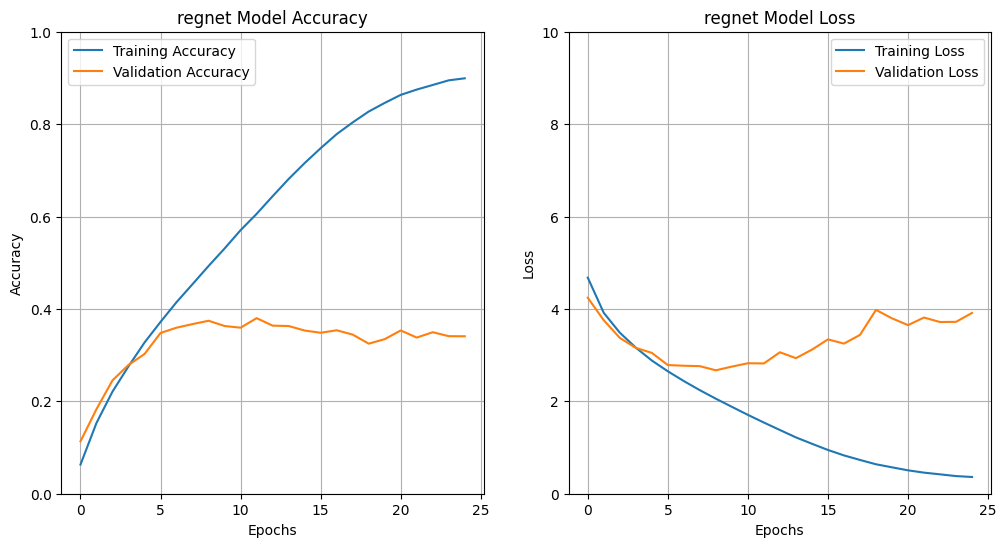

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers
from tensorflow.keras.optimizers import SGD

# TinyImageNet Dataset Class
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(64, 64, 3), num_classes=200, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize regnet Model
regnet_model = build_regnet((64, 64, 3), 200)

# Compile the model with the new optimizer
regnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train regnet Model
regnet_history = regnet_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(regnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(regnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('regnet Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(regnet_history.history['loss'], label='Training Loss')
plt.plot(regnet_history.history['val_loss'], label='Validation Loss')
plt.title('regnet Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()
plt.grid()

plt.show()

#GOOGLENET TINYIMAGENET

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

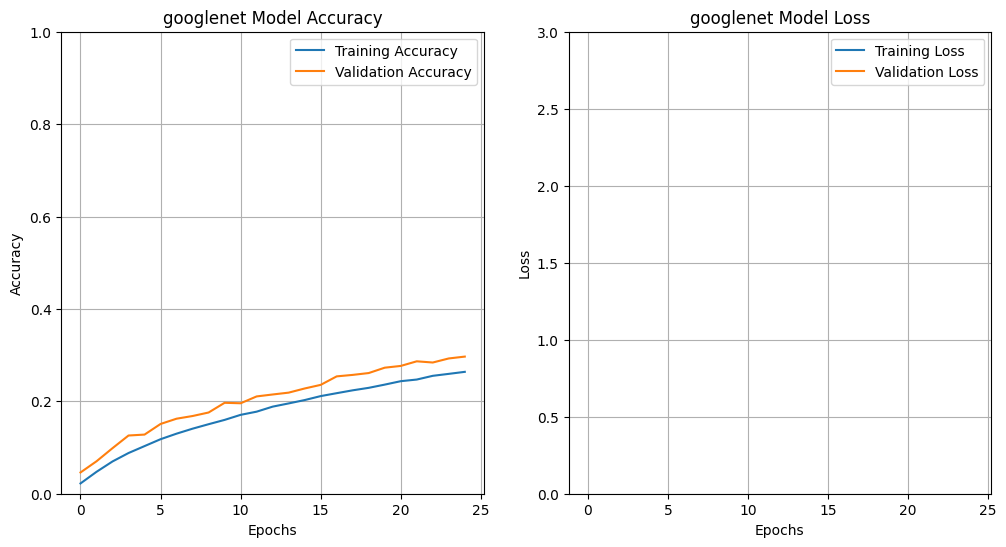

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize googlenet Model
googlenet_model = build_googlenet((64, 64, 3), 200)
googlenet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train googlenet Model
googlenet_history = googlenet_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(googlenet_history.history['accuracy'], label='Training Accuracy')
plt.plot(googlenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('googlenet Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(googlenet_history.history['loss'], label='Training Loss')
plt.plot(googlenet_history.history['val_loss'], label='Validation Loss')
plt.title('googlenet Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()



#TINYIMAGENET VGG GOOGLENET

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 221s 68ms/step - accuracy: 0.0067 - loss: 6.2727 - val_accuracy: 0.0112 - val_loss: 5.0876
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 186s 63ms/step - accuracy: 0.0150 - loss: 5.0628 - val_accuracy: 0.0186 - val_loss: 4.9733
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 185s 62ms/step - accuracy: 0.0205 - loss: 4.9528 - val_accuracy: 0.0278 - val_loss: 4.8731
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 185s 62ms/step - accuracy: 0.0263 - loss: 4.8578 - val_accuracy: 0.0352 - val_loss: 4.7673
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 185s 62ms/step - accuracy: 0.0355 - loss: 4.7478 - val_accuracy: 0.0454 - val_loss: 4.6122
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 186s 63ms/step - accuracy: 0.0441 - loss: 4.6284 - val_accuracy: 0.0554 - val_loss: 4.5432
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 187s 63ms/step - accuracy: 0.0542 - loss: 4.5512 - val_accuracy: 0.0574 - val_loss: 4.5250
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 185s 62ms/step - accuracy: 

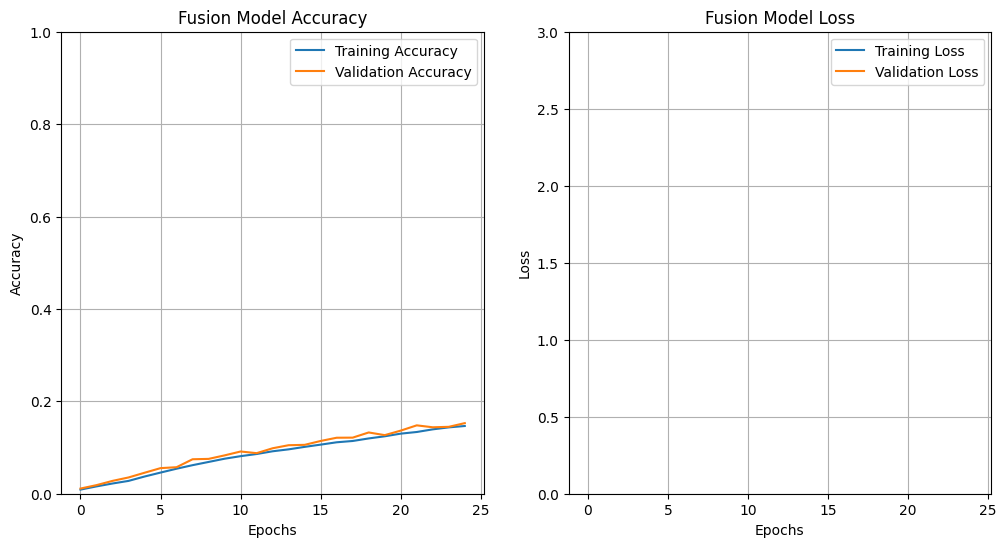

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step

Evaluation Metrics:
Train-Accuracy: 0.16, F1-score: 0.13, ROC-AUC: 0.90
Validation-Accuracy: 0.15, F1-score: 0.12, ROC-AUC: 0.90
Test-Accuracy: 0.15, F1-score: 0.12, ROC-AUC: 0.90


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogLeNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

# TINYIMAGENET vgg RESNET FUSION 1

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 280s 89ms/step - accuracy: 0.0077 - loss: 6.2486 - val_accuracy: 0.0176 - val_loss: 5.0361
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 254s 86ms/step - accuracy: 0.0202 - loss: 4.9720 - val_accuracy: 0.0288 - val_loss: 4.7585
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 254s 85ms/step - accuracy: 0.0339 - loss: 4.6990 - val_accuracy: 0.0478 - val_loss: 4.5484
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 254s 85ms/step - accuracy: 0.0510 - loss: 4.5252 - val_accuracy: 0.0526 - val_loss: 4.4361
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 253s 85ms/step - accuracy: 0.0603 - loss: 4.4160 - val_accuracy: 0.0722 - val_loss: 4.3134
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 254s 85ms/step - accuracy: 0.0726 - loss: 4.3011 - val_accuracy: 0.0770 - val_loss: 4.2278
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 253s 85ms/step - accuracy: 0.0840 - loss: 4.2043 - val_accuracy: 0.0876 - val_loss: 4.1901
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 253s 85ms/step - accuracy: 

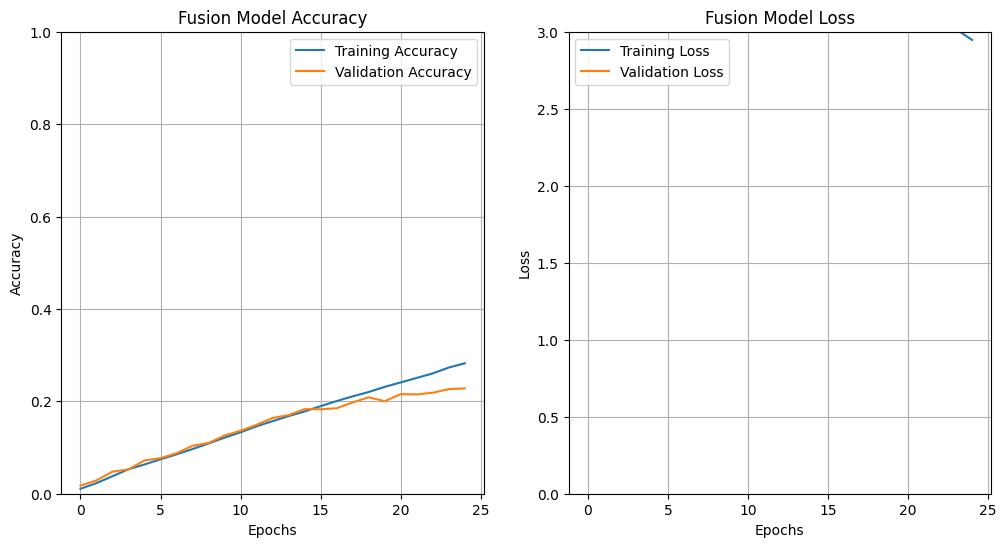

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step

Evaluation Metrics:
Train-Accuracy: 0.31, F1-score: 0.29, ROC-AUC: 0.96
Validation-Accuracy: 0.23, F1-score: 0.21, ROC-AUC: 0.93
Test-Accuracy: 0.22, F1-score: 0.20, ROC-AUC: 0.92


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)


# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)


# Define VGG16 Model
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    resnet_model = build_resnet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_resnet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    resnet_features = resnet_model(input_resnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([vgg_features, resnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_resnet], outputs=output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

#Fusion 1 googlenet resnet tinyimagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

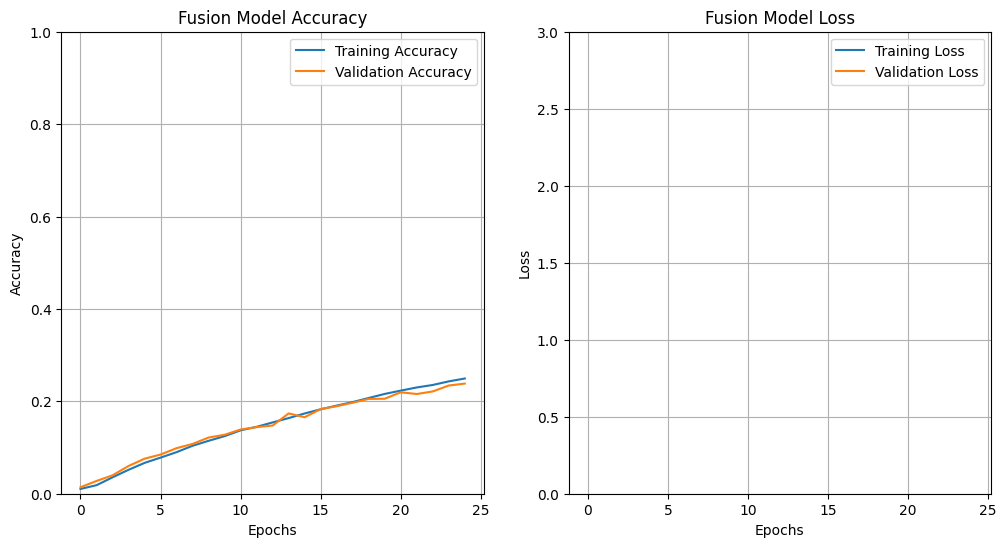

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step

Evaluation Metrics:
Train-Accuracy: 0.26, F1-score: 0.24, ROC-AUC: 0.94
Validation-Accuracy: 0.24, F1-score: 0.21, ROC-AUC: 0.93
Test-Accuracy: 0.24, F1-score: 0.21, ROC-AUC: 0.93


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define Fusion Model (GoogleNet + ResNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([resnet_features, googlenet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

#fusion 2 googlenet reset tiny imagenet

Downloading...


100%|██████████| 248M/248M [00:28<00:00, 8.61MB/s]


Extracting...
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 4

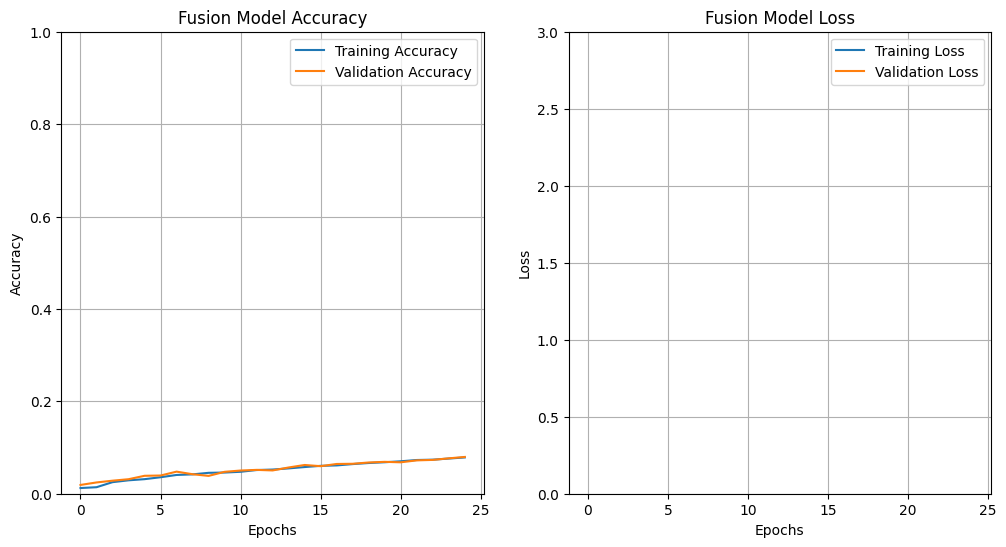

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step

Evaluation Metrics:
Train-Accuracy: 0.08, F1-score: 0.04, ROC-AUC: 0.59
Validation-Accuracy: 0.08, F1-score: 0.04, ROC-AUC: 0.59
Test-Accuracy: 0.08, F1-score: 0.04, ROC-AUC: 0.58


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)

# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)

# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogleNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define Fusion Model (GoogleNet + ResNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two backbones
    resnet_model = build_resnet(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_resnet = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    resnet_features = resnet_model(input_resnet)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([resnet_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_resnet, input_googlenet], outputs=combined_output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

#fusion 2 vgg resnet tinyimagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 291s 92ms/step - accuracy: 0.0092 - loss: 6.3054 - val_accuracy: 0.0146 - val_loss: 5.2907
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0156 - loss: 5.2896 - val_accuracy: 0.0178 - val_loss: 5.2882
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0206 - loss: 5.2852 - val_accuracy: 0.0258 - val_loss: 5.2810
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0266 - loss: 5.2798 - val_accuracy: 0.0308 - val_loss: 5.2759
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0324 - loss: 5.2743 - val_accuracy: 0.0346 - val_loss: 5.2714
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 264s 89ms/step - accuracy: 0.0341 - loss: 5.2724 - val_accuracy: 0.0352 - val_loss: 5.2715
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 263s 89ms/step - accuracy: 0.0389 - loss: 5.2677 - val_accuracy: 0.0386 - val_loss: 5.2687
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 263s 89ms/step - accuracy: 

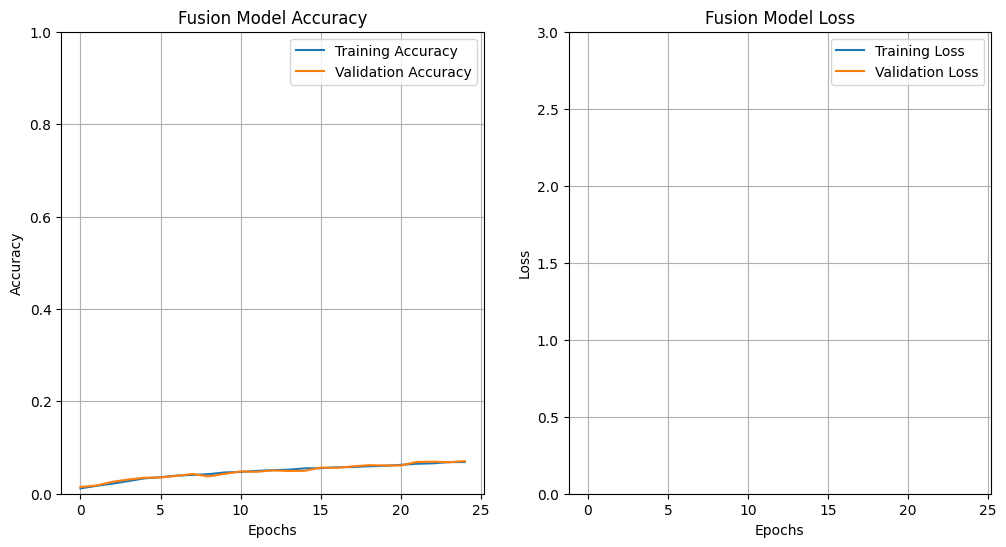

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 75s 25ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step

Evaluation Metrics:
Train-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.55
Validation-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.55
Test-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.55


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ResNet Block
def resnet_block(x, filters, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', strides=strides, activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(shortcut)
    x = layers.add([x, shortcut])
    return layers.Activation('relu')(x)


# Define ResNet Architecture
def build_resnet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, x)


# Define VGG16 Model
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two models (ResNet + VGG16)
    resnet_model = build_resnet(input_shape, num_classes)
    vgg16_model = build_vgg16(input_shape, num_classes)

    # Define inputs
    input_resnet = layers.Input(shape=input_shape)
    input_vgg16 = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    resnet_output = resnet_model(input_resnet)
    vgg16_output = vgg16_model(input_vgg16)

    # Normalize outputs to ensure they are probabilities
    resnet_probs = layers.Activation('softmax')(resnet_output)
    vgg16_probs = layers.Activation('softmax')(vgg16_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([resnet_probs, vgg16_probs])


    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_resnet, input_vgg16], outputs=combined_probs)
    return committee_fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

# fusion 2 vgg googlenet tinyimagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 211s 66ms/step - accuracy: 0.0081 - loss: 6.3072 - val_accuracy: 0.0128 - val_loss: 5.2911
Epoch 2/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0153 - loss: 5.2893 - val_accuracy: 0.0230 - val_loss: 5.2843
Epoch 3/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0212 - loss: 5.2850 - val_accuracy: 0.0274 - val_loss: 5.2795
Epoch 4/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0255 - loss: 5.2811 - val_accuracy: 0.0308 - val_loss: 5.2751
Epoch 5/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0316 - loss: 5.2749 - val_accuracy: 0.0316 - val_loss: 5.2735
Epoch 6/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0348 - loss: 5.2724 - val_accuracy: 0.0360 - val_loss: 5.2709
Epoch 7/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 0.0371 - loss: 5.2694 - val_accuracy: 0.0436 - val_loss: 5.2652
Epoch 8/25
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 183s 62ms/step - accuracy: 

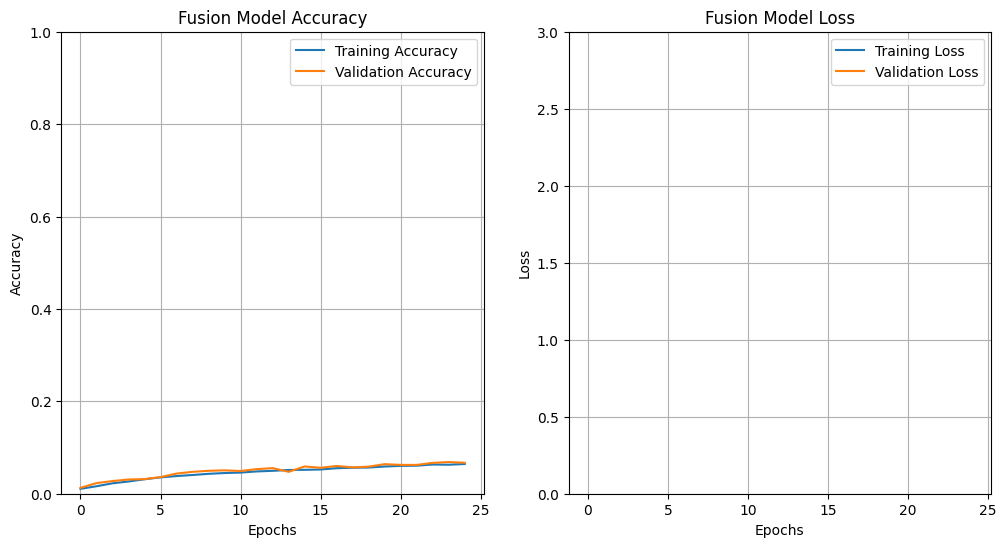

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step

Evaluation Metrics:
Train-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.56
Validation-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.56
Test-Accuracy: 0.07, F1-score: 0.02, ROC-AUC: 0.55


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define Inception Module
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Define GoogLeNet Architecture
def build_googlenet(input_shape=(64, 64, 3), num_classes=200):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# Define VGG16 Model
def build_vgg16(input_shape=(64, 64, 3), num_classes=200):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define Fusion Model (VGG + GoogleNet)
def build_fusion_model(input_shape=(64, 64, 3), num_classes=200):
    # Instantiate the two backbones
    vgg16_model = build_vgg16(input_shape, num_classes)
    googlenet_model = build_googlenet(input_shape, num_classes)

    # Define inputs
    input_vgg = Input(shape=input_shape)
    input_googlenet = Input(shape=input_shape)

    # Extract embeddings
    vgg_features = vgg16_model(input_vgg)
    googlenet_features = googlenet_model(input_googlenet)

    # Normalize outputs to ensure they are probabilities
    vgg_probs = layers.Activation('softmax')(vgg_features)
    googlenet_probs = layers.Activation('softmax')(googlenet_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([vgg_probs, googlenet_probs])

    # Final model
    fusion_model = models.Model(inputs=[input_vgg, input_googlenet], outputs=combined_output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)

#Convnext tinyimagenet

Files already downloaded and verified.
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 4

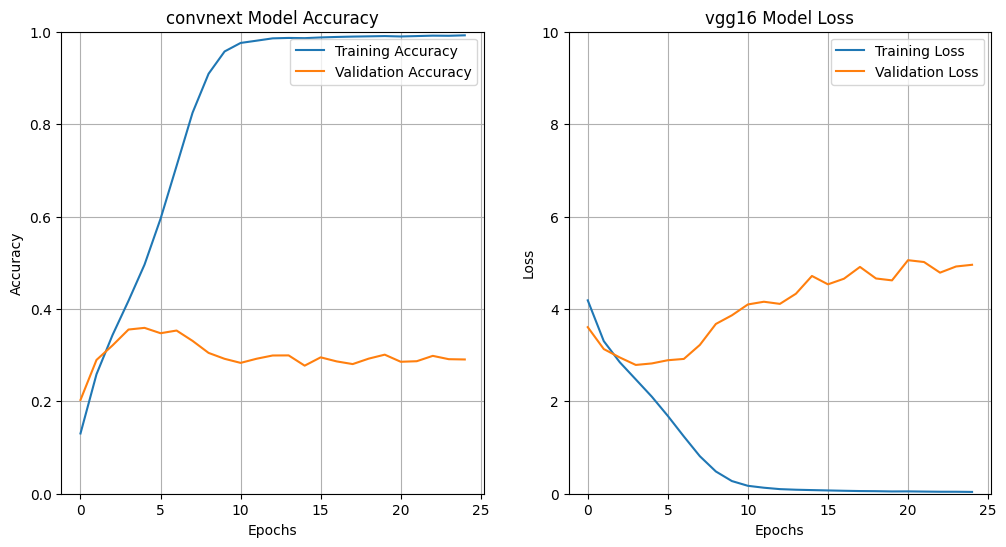

In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


# Define ConvNeXt Block
def convnext_block(x, filters, strides=1, use_se=False):
    # Initial Conv Layer
    shortcut = x
    x = layers.Conv2D(filters, (7, 7), strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Depthwise Separable Convolution (effectively replacing traditional convolution)
    x = layers.DepthwiseConv2D((3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Pointwise Convolution (1x1)
    x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Squeeze-and-Excitation (Optional)
    if use_se:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Dense(filters // 16, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        x = layers.multiply([x, se])

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('gelu')(x)

    return x


# Define ConvNeXt Architecture
def build_convnext(input_shape=(64, 64, 3), num_classes=200, use_se=False):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # ConvNeXt Blocks with various filter sizes
    x = convnext_block(x, 128, strides=2, use_se=use_se)
    x = convnext_block(x, 256, strides=2, use_se=use_se)
    x = convnext_block(x, 512, strides=2, use_se=use_se)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize convnext Model
convnext_model = build_convnext((64, 64, 3), 200)
convnext_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train convnext Model
convnext_history = convnext_model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(convnext_history.history['accuracy'], label='Training Accuracy')
plt.plot(convnext_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('convnext Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(convnext_history.history['loss'], label='Training Loss')
plt.plot(convnext_history.history['val_loss'], label='Validation Loss')
plt.title('vgg16 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()
plt.grid()

plt.show()



# regnet convnext fusion 2 mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 187s 78ms/step - accuracy: 0.9021 - loss: 1.2080 - val_accuracy: 0.9870 - val_loss: 0.8423
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9892 - loss: 0.8308 - val_accuracy: 0.9896 - val_loss: 0.8260
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9941 - loss: 0.8168 - val_accuracy: 0.9918 - val_loss: 0.8197
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9956 - loss: 0.8126 - val_accuracy: 0.9922 - val_loss: 0.8193
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9963 - loss: 0.8103 - val_accuracy: 0.9918 - val_loss: 0.8186
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9962 - loss: 0.8084 - val_accuracy: 0.9934 - val_loss: 0.8113
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 64ms/step - accuracy: 0.9972 - loss: 0.8061 - val_accuracy: 0.9936 - val_loss: 0.8109
Epoch 8/25
1719/17

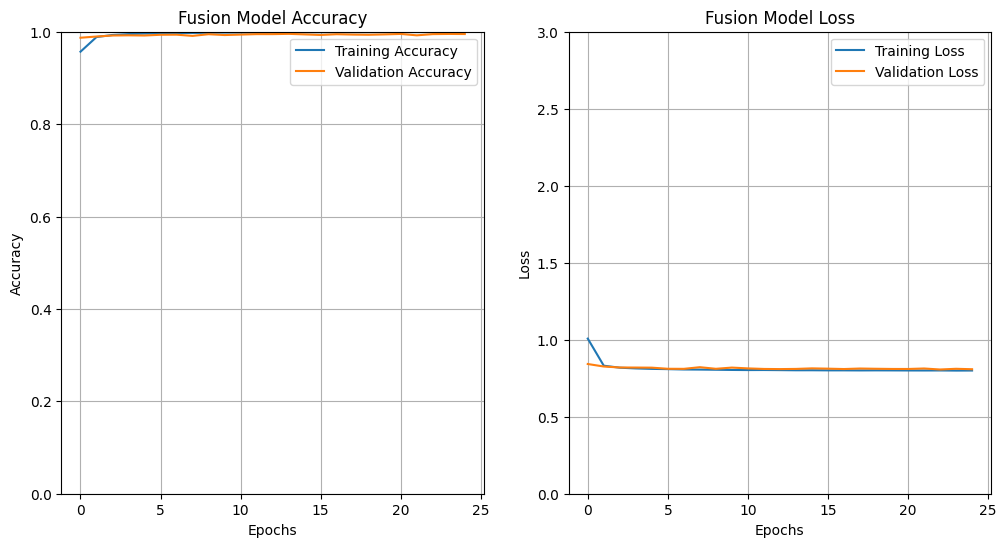

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 1.00, ROC-AUC: 1.00
Test-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(28, 28, 1), num_classes=10, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define ConvNeXt Block
def convnext_block(x, filters, strides=1, use_se=False):
    # Initial Conv Layer
    shortcut = x
    x = layers.Conv2D(filters, (7, 7), strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Depthwise Separable Convolution (effectively replacing traditional convolution)
    x = layers.DepthwiseConv2D((3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Pointwise Convolution (1x1)
    x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Squeeze-and-Excitation (Optional)
    if use_se:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Dense(filters // 16, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        x = layers.multiply([x, se])

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('gelu')(x)

    return x


# Define ConvNeXt Architecture
def build_convnext(input_shape=(28, 28, 1), num_classes=10, use_se=False):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # ConvNeXt Blocks with various filter sizes
    x = convnext_block(x, 128, strides=2, use_se=use_se)
    x = convnext_block(x, 256, strides=2, use_se=use_se)
    x = convnext_block(x, 512, strides=2, use_se=use_se)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)

# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_committee_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two models (ResNet + VGG16)
    regnet_model = build_regnet(input_shape, num_classes)
    convnext_model = build_convnext(input_shape, num_classes)

    # Define inputs
    input_regnet = layers.Input(shape=input_shape)
    input_convnext = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    regnet_output = regnet_model(input_regnet)
    convnext_output = convnext_model(input_convnext)

    # Normalize outputs to ensure they are probabilities
    regnet_probs = layers.Activation('softmax')(regnet_output)
    convnext_probs = layers.Activation('softmax')(convnext_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([regnet_probs, convnext_probs])

    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_regnet, input_convnext], outputs=combined_probs)
    return committee_fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_committee_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()




def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)




# regnet convnext fusion2 cifar

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 154s 85ms/step - accuracy: 0.4046 - loss: 1.9793 - val_accuracy: 0.5181 - val_loss: 1.7600
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.5877 - loss: 1.6454 - val_accuracy: 0.5913 - val_loss: 1.5976
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 79ms/step - accuracy: 0.6821 - loss: 1.4976 - val_accuracy: 0.6442 - val_loss: 1.5355
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 79ms/step - accuracy: 0.7617 - loss: 1.3906 - val_accuracy: 0.6737 - val_loss: 1.4858
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.8295 - loss: 1.2991 - val_accuracy: 0.6973 - val_loss: 1.4422
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.8769 - loss: 1.2153 - val_accuracy: 0.6994 - val_loss: 1.4273
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.8987 - loss: 1.1663 - val_accuracy: 0.7088 - val_loss: 1.4050
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.9207 

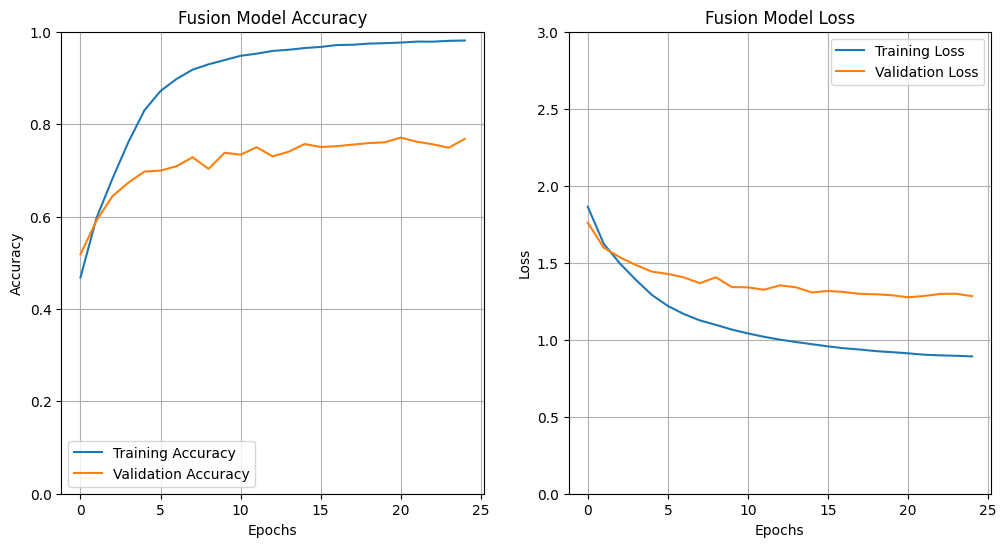

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step

Evaluation Metrics:
Train - Accuracy: 0.99, F1 Score: 0.99, ROC-AUC: 1.00
Validation - Accuracy: 0.77, F1 Score: 0.77, ROC-AUC: 0.96
Test - Accuracy: 0.76, F1 Score: 0.75, ROC-AUC: 0.95


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(32, 32, 3), num_classes=10, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define ConvNeXt Block
def convnext_block(x, filters, strides=1, use_se=False):
    # Initial Conv Layer
    shortcut = x
    x = layers.Conv2D(filters, (7, 7), strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Depthwise Separable Convolution (effectively replacing traditional convolution)
    x = layers.DepthwiseConv2D((3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Pointwise Convolution (1x1)
    x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Squeeze-and-Excitation (Optional)
    if use_se:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Dense(filters // 16, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        x = layers.multiply([x, se])

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('gelu')(x)

    return x


# Define ConvNeXt Architecture
def build_convnext(input_shape=(32, 32, 3), num_classes=10, use_se=False):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # ConvNeXt Blocks with various filter sizes
    x = convnext_block(x, 128, strides=2, use_se=use_se)
    x = convnext_block(x, 256, strides=2, use_se=use_se)
    x = convnext_block(x, 512, strides=2, use_se=use_se)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)

# Define Fusion Model (Committee Fusion: ResNet + VGG16)
def build_committee_fusion_model(input_shape=(32, 32, 3), num_classes=10):
    # Instantiate the two models (ResNet + VGG16)
    regnet_model = build_regnet(input_shape, num_classes)
    convnext_model = build_convnext(input_shape, num_classes)

    # Define inputs
    input_regnet = layers.Input(shape=input_shape)
    input_convnext = layers.Input(shape=input_shape)

    # Independent outputs for each stream
    regnet_output = regnet_model(input_regnet)
    convnext_output = convnext_model(input_convnext)

    # Normalize outputs to ensure they are probabilities
    regnet_probs = layers.Activation('softmax')(regnet_output)
    convnext_probs = layers.Activation('softmax')(convnext_output)


    # Combine probabilities using the product rule
    combined_probs = layers.Multiply()([regnet_probs, convnext_probs])


    # Committee Fusion model
    committee_fusion_model = models.Model(inputs=[input_regnet, input_convnext], outputs=combined_probs)
    return committee_fusion_model



# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Split training data into train and validation sets
val_split = int(0.8 * len(train_images))
val_images, val_labels = train_images[val_split:], train_labels[val_split:]
train_images, train_labels = train_images[:val_split], train_labels[:val_split]
train_labels_onehot = to_categorical(train_labels, num_classes=10)
val_labels_onehot = to_categorical(val_labels, num_classes=10)

# Initialize Fusion Model
fusion_model = build_committee_fusion_model((32, 32, 3), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate([train_images, train_images], train_labels, verbose=0)
    train_predictions = np.argmax(model.predict([train_images, train_images]), axis=1)
    train_probabilities = model.predict([train_images, train_images])
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate([val_images, val_images], val_labels, verbose=0)
    val_predictions = np.argmax(model.predict([val_images, val_images]), axis=1)
    val_probabilities = model.predict([val_images, val_images])
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate([test_images, test_images], test_labels, verbose=0)
    test_predictions = np.argmax(model.predict([test_images, test_images]), axis=1)
    test_probabilities = model.predict([test_images, test_images])
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

# Perform the evaluation
evaluate_metrics(fusion_model, train_images, train_labels_onehot, val_images, val_labels_onehot, test_images, test_labels_onehot)


# mnist fusion 1 regconvnext

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 179s 77ms/step - accuracy: 0.6713 - loss: 0.9835 - val_accuracy: 0.9796 - val_loss: 0.0774
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 112s 65ms/step - accuracy: 0.9803 - loss: 0.0766 - val_accuracy: 0.9854 - val_loss: 0.0509
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9900 - loss: 0.0389 - val_accuracy: 0.9864 - val_loss: 0.0587
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9915 - loss: 0.0316 - val_accuracy: 0.9848 - val_loss: 0.0652
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9934 - loss: 0.0242 - val_accuracy: 0.9904 - val_loss: 0.0401
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9951 - loss: 0.0172 - val_accuracy: 0.9904 - val_loss: 0.0424
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 0.9945 - loss: 0.0181 - val_accuracy: 0.9874 - val_loss: 0.0532
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 111s 65ms/step - accuracy: 

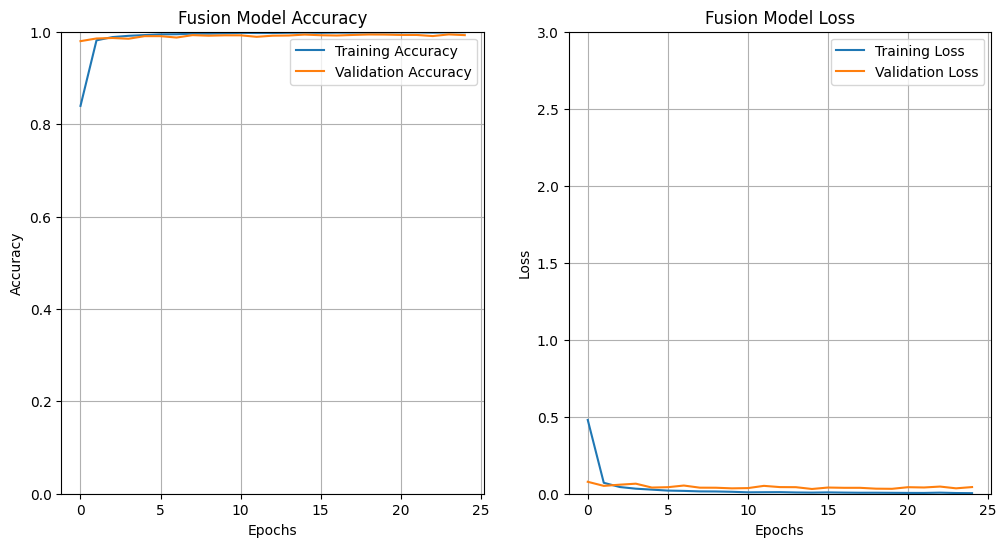

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step

Evaluation Metrics:
Train-Accuracy: 1.00, F1-score: 1.00, ROC-AUC: 1.00
Validation-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00
Test-Accuracy: 0.99, F1-score: 0.99, ROC-AUC: 1.00


In [ ]:
from tensorflow.keras import layers, models, Input, regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(28, 28, 1), num_classes=10, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define ConvNeXt Block
def convnext_block(x, filters, strides=1, use_se=False):
    # Initial Conv Layer
    shortcut = x
    x = layers.Conv2D(filters, (7, 7), strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Depthwise Separable Convolution (effectively replacing traditional convolution)
    x = layers.DepthwiseConv2D((3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Pointwise Convolution (1x1)
    x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Squeeze-and-Excitation (Optional)
    if use_se:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Dense(filters // 16, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        x = layers.multiply([x, se])

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('gelu')(x)

    return x


# Define ConvNeXt Architecture
def build_convnext(input_shape=(28, 28, 1), num_classes=10, use_se=False):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # ConvNeXt Blocks with various filter sizes
    x = convnext_block(x, 128, strides=2, use_se=use_se)
    x = convnext_block(x, 256, strides=2, use_se=use_se)
    x = convnext_block(x, 512, strides=2, use_se=use_se)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)

# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(28, 28, 1), num_classes=10):
    # Instantiate the two backbones
    convnext_model = build_convnext(input_shape, num_classes)
    regnet_model = build_regnet(input_shape, num_classes)

    # Define inputs
    input_convnext = Input(shape=input_shape)
    input_regnet = Input(shape=input_shape)

    # Extract embeddings

    convnext_features = convnext_model(input_convnext)
    regnet_features = regnet_model(input_regnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([convnext_features, regnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_convnext, input_regnet], outputs=output)
    return fusion_model

# Load MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Preprocess data
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
mnist_train_labels_onehot = to_categorical(mnist_train_labels, num_classes=10)
mnist_test_labels_onehot = to_categorical(mnist_test_labels, num_classes=10)

# Validation set
mnist_val_images, mnist_val_labels_onehot = mnist_train_images[:5000], mnist_train_labels_onehot[:5000]
mnist_train_images, mnist_train_labels_onehot = mnist_train_images[5000:], mnist_train_labels_onehot[5000:]

# Define train labels for ROC-AUC
train_labels = mnist_train_labels
train_images = mnist_train_images
test_labels = mnist_test_labels
test_images = mnist_test_images

# Initialize Fusion Model
fusion_model = build_fusion_model((28, 28, 1), 10)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [mnist_train_images, mnist_train_images], mnist_train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=([mnist_val_images, mnist_val_images], mnist_val_labels_onehot),
    verbose=1
)

# Plot Accuracy and Loss for Fusion Model
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Normalize accuracy axis
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)  # Normalize loss axis
plt.legend()
plt.grid()

plt.show()

from sklearn.metrics import classification_report

def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):


    # Get predictions
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    # Convert probabilities to class predictions
    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    # Convert one-hot labels back to class labels
    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    # Compute metrics
    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=10), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=10), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=10), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    # Print Results
    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the trained fusion model
evaluate_model(fusion_model, mnist_train_images, mnist_train_labels_onehot,
               mnist_val_images, mnist_val_labels_onehot,
               mnist_test_images, mnist_test_labels_onehot)




# fusion 2 hybrid setio cifar

Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.2397 - loss: 2.1765 - val_accuracy: 0.4464 - val_loss: 1.9004
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.4347 - loss: 1.9151 - val_accuracy: 0.5102 - val_loss: 1.7831
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5104 - loss: 1.7911 - val_accuracy: 0.5636 - val_loss: 1.6983
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5539 - loss: 1.7243 - val_accuracy: 0.5842 - val_loss: 1.6633
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5838 - loss: 1.6779 - val_accuracy: 0.6114 - val_loss: 1.6253
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6148 - loss: 1.6330 - val_accuracy: 0.6292 - val_loss: 1.5932
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6372 - loss: 1.5993 - val_accuracy: 0.6293 - val_loss: 1.5902
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6615 -

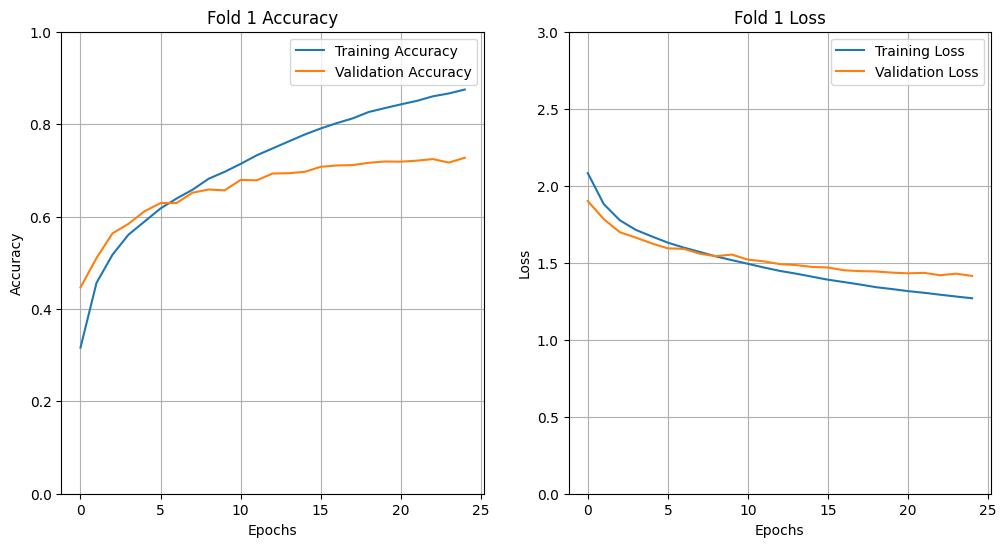

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Evaluation Metrics:
Train - Accuracy: 0.92, F1 Score: 0.92, ROC-AUC: 0.98
Validation - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.93
Test - Accuracy: 0.72, F1 Score: 0.73, ROC-AUC: 0.93
Confusion Matrix:
[[763  18  59  22  14  13  11  10  51  39]
 [ 23 814   7  11   3  11  10   4  20  97]
 [ 55   6 626  61  96  72  39  27   7  11]
 [ 16   9  82 540  67 185  50  25   9  17]
 [ 14   5  89  56 705  32  52  33  12   2]
 [ 10   3  68 153  59 637  23  30  11   6]
 [  3   4  59  66  38  26 787   7   6   4]
 [ 15   2  38  39  78  64   5 745   5   9]
 [ 59  37  14  22   3  11   5   4 808  37]
 [ 26  52   7  27   9   5   7  17  35 815]]
Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.2450 - loss: 2.1680 - val_accuracy: 0.4262 - val_loss: 1.8980
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.4331 - loss: 1.8975 - val_accuracy: 0.4978 - val_loss: 1.7877
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.4904 - loss: 1.8048 - val_accuracy: 0.5429 - val_loss: 1.7206
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5384 - loss: 1.7349 - val_accuracy: 0.5663 - val_loss: 1.6815
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5666 - loss: 1.6934 - val_accuracy: 0.5616 - val_loss: 1.6821
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5954 - loss: 1.6530 - val_accuracy: 0.6094 - val_loss: 1.6273
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6297 - loss: 1.6075 - val_accuracy: 0.6223 - val_loss: 1.5997
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6461 -

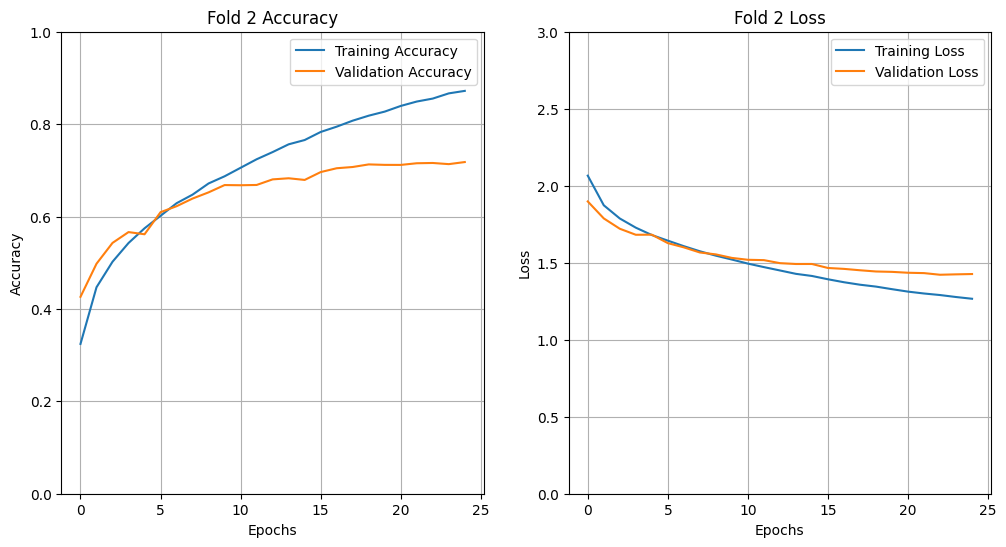

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Evaluation Metrics:
Train - Accuracy: 0.92, F1 Score: 0.92, ROC-AUC: 0.98
Validation - Accuracy: 0.72, F1 Score: 0.72, ROC-AUC: 0.93
Test - Accuracy: 0.72, F1 Score: 0.72, ROC-AUC: 0.93
Confusion Matrix:
[[723  23  45  25  15   8  20  16  70  55]
 [ 11 840   5  14   6   8  14   7  16  79]
 [ 63   8 563  64  81  73  72  57   8  11]
 [ 13   9  44 554  57 184  57  49  11  22]
 [ 17   3  58  71 635  26  80  99   8   3]
 [  9   5  39 154  42 658  26  57   7   3]
 [  1   5  44  62  28  33 806   8   7   6]
 [ 11   3  20  30  35  55  16 815   1  14]
 [ 41  43  10  20   7  10   8  11 814  36]
 [ 20  77   5  24   4   6  15  27  22 800]]
Fold 3/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.2361 - loss: 2.1782 - val_accuracy: 0.4241 - val_loss: 1.9432
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.4081 - loss: 1.9503 - val_accuracy: 0.4843 - val_loss: 1.8325
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.4727 - loss: 1.8522 - val_accuracy: 0.5137 - val_loss: 1.7785
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5160 - loss: 1.7868 - val_accuracy: 0.5468 - val_loss: 1.7330
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5549 - loss: 1.7276 - val_accuracy: 0.5796 - val_loss: 1.6735
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5885 - loss: 1.6729 - val_accuracy: 0.5933 - val_loss: 1.6501
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.6146 - loss: 1.6379 - val_accuracy: 0.6176 - val_loss: 1.6142
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6387 -

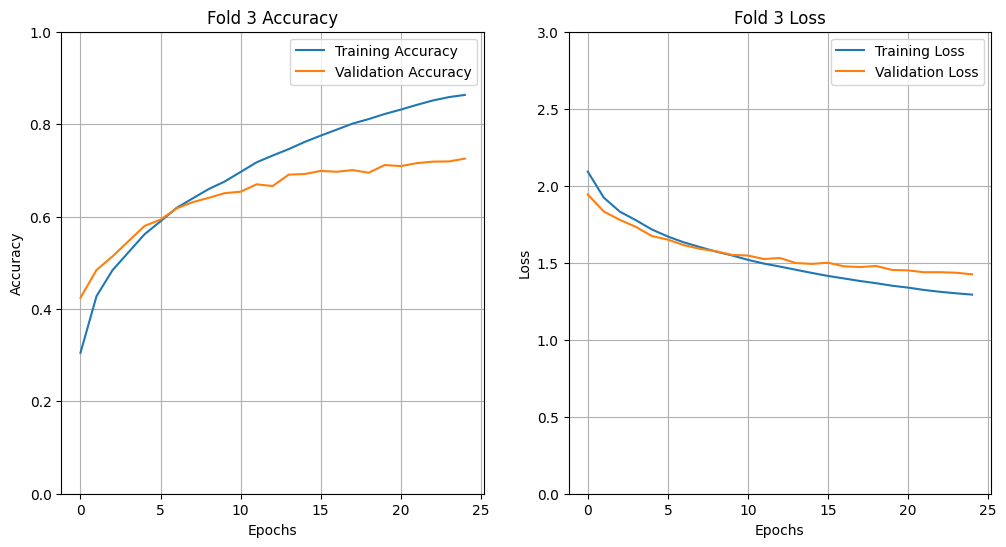

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Evaluation Metrics:
Train - Accuracy: 0.91, F1 Score: 0.91, ROC-AUC: 0.97
Validation - Accuracy: 0.73, F1 Score: 0.72, ROC-AUC: 0.93
Test - Accuracy: 0.72, F1 Score: 0.72, ROC-AUC: 0.93
Confusion Matrix:
[[770  17  42  15   9   8  18  16  68  37]
 [ 15 818   6  13   2   5  12   8  28  93]
 [ 67   8 541  50  93  98  76  42  10  15]
 [ 18  13  57 497  53 193  82  47  19  21]
 [ 24   3  53  46 630  49  80  86  24   5]
 [ 11   4  33 144  43 659  29  54   8  15]
 [  7   7  43  56  21  27 820   5   7   7]
 [  8   0  27  26  38  64  11 798  11  17]
 [ 48  34  10  12   3   7   7   7 847  25]
 [ 36  64   4  11   2  10   8  27  28 810]]
Fold 4/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.2288 - loss: 2.1870 - val_accuracy: 0.3953 - val_loss: 1.9510
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.4144 - loss: 1.9367 - val_accuracy: 0.4979 - val_loss: 1.8227
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.4900 - loss: 1.8279 - val_accuracy: 0.5293 - val_loss: 1.7614
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5230 - loss: 1.7678 - val_accuracy: 0.5680 - val_loss: 1.7025
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.5580 - loss: 1.7242 - val_accuracy: 0.5867 - val_loss: 1.6803
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5849 - loss: 1.6798 - val_accuracy: 0.6036 - val_loss: 1.6491
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6060 - loss: 1.6472 - val_accuracy: 0.6090 - val_loss: 1.6304
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6303 -

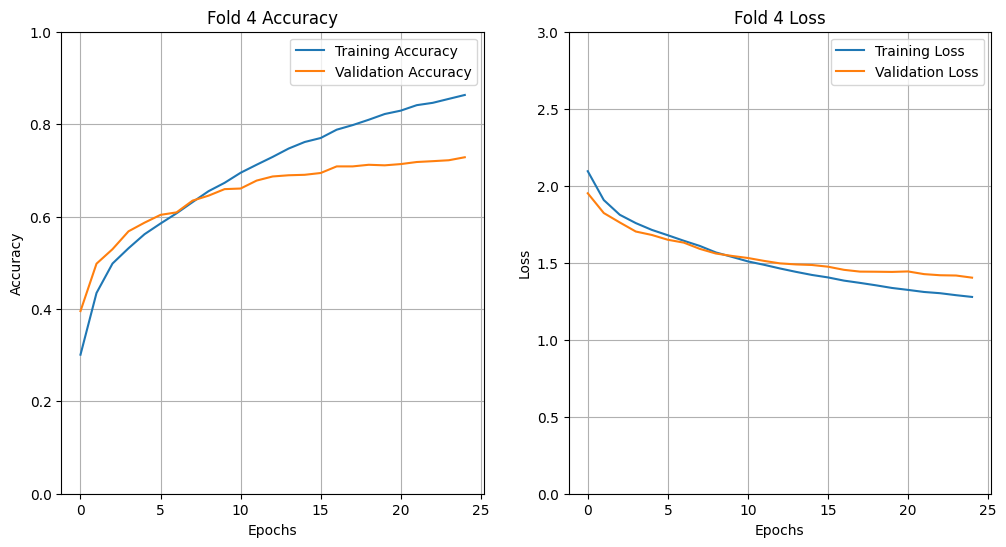

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Evaluation Metrics:
Train - Accuracy: 0.91, F1 Score: 0.91, ROC-AUC: 0.97
Validation - Accuracy: 0.73, F1 Score: 0.73, ROC-AUC: 0.94
Test - Accuracy: 0.71, F1 Score: 0.71, ROC-AUC: 0.93
Confusion Matrix:
[[742  31  50  21  10   4  16  17  71  38]
 [ 12 831   4  12   3   6  15  10  23  84]
 [ 56   9 553  68  70  86 105  31  12  10]
 [ 17  12  57 547  43 137 109  39  14  25]
 [ 21   4  58  64 599  30 119  84  18   3]
 [  6   3  43 175  38 623  44  47  13   8]
 [  5   4  34  49  11  15 867   5   4   6]
 [ 12   3  27  38  41  62  18 777   5  17]
 [ 60  44  13  15   1   6  12   6 816  27]
 [ 22  85   4  22   2   7  12  18  37 791]]
Fold 5/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.2534 - loss: 2.1694 - val_accuracy: 0.4352 - val_loss: 1.9128
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.4263 - loss: 1.9183 - val_accuracy: 0.4967 - val_loss: 1.7898
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.4891 - loss: 1.8127 - val_accuracy: 0.5329 - val_loss: 1.7281
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5345 - loss: 1.7411 - val_accuracy: 0.5739 - val_loss: 1.6705
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5730 - loss: 1.6850 - val_accuracy: 0.5947 - val_loss: 1.6395
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.5998 - loss: 1.6423 - val_accuracy: 0.6055 - val_loss: 1.6169
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6235 - loss: 1.6128 - val_accuracy: 0.6322 - val_loss: 1.5891
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.6450 -

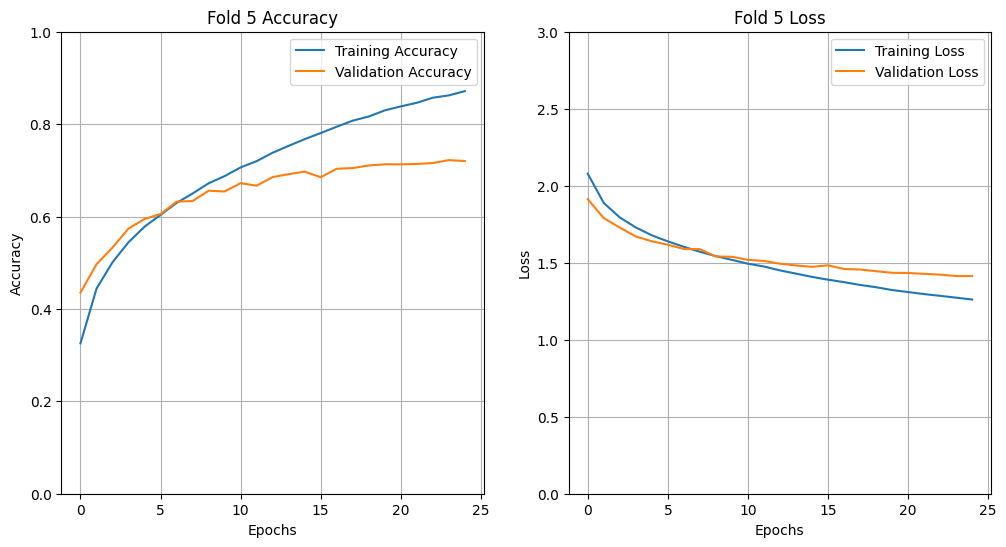

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Evaluation Metrics:
Train - Accuracy: 0.92, F1 Score: 0.92, ROC-AUC: 0.98
Validation - Accuracy: 0.72, F1 Score: 0.72, ROC-AUC: 0.93
Test - Accuracy: 0.72, F1 Score: 0.72, ROC-AUC: 0.93
Confusion Matrix:
[[782  23  34  18   9   4  15   9  66  40]
 [ 18 836   2   9   2   4   5   4  27  93]
 [ 70  10 569  92  81  44  62  35  21  16]
 [ 16  17  61 621  41 121  50  29  17  27]
 [ 24   2  69  93 632  24  61  67  22   6]
 [ 14   7  49 217  32 589  24  40  19   9]
 [  5   8  41  74  21  22 804   2  12  11]
 [ 14   2  32  62  38  57  14 753   6  22]
 [ 58  44   8  14   1   4   7   7 831  26]
 [ 35  64   6  19   3   5   5  19  31 813]]

Average Metrics over 5 folds:
Train Accuracy: 0.92
Validation Accuracy: 0.72
Test Accuracy: 0.72
Train F1 Score: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers,Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


# Inception module (simplified with fewer filters)
def inception_module(x, filters):
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    return layers.Concatenate()([path1, path2, path3, path4])

# Hybrid GoogleNet-VGG16 model (simplified version)
def hybrid_googlenet_vgg16(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    # First Conv Layer (same as VGG)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)

    # Replace VGG's Conv Blocks with Inception Modules (fewer filters)
    x = inception_module(x, [32, 48, 64, 8, 16, 16])
    x = inception_module(x, [64, 64, 96, 16, 48, 32])

    # Pooling layer (same as VGG)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)

    # Smaller fully connected layers (to reduce GPU load)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define the CNN model
def create_setio_2d_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the Dense Layer
    model.add(layers.Flatten())

    # Fully Connected Layers for Classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

    return model


# Define Fusion Model (Hybrid GoogleNet + SetIO 2D CNN)
def build_fusion_model_hybrid_setio(input_shape=(32,32,3), num_classes=10):

    # Instantiate the two backbones
    hybrid_googlenet_model = hybrid_googlenet_vgg16(input_shape, num_classes)
    setio_2d_cnn_model = create_setio_2d_cnn(input_shape, num_classes)

    # Define inputs
    input_hybrid_googlenet = Input(shape=input_shape)
    input_setio_2d_cnn = Input(shape=input_shape)

    # Extract features from both models
    hybrid_googlenet_features = hybrid_googlenet_model(input_hybrid_googlenet)
    setio_2d_cnn_features = setio_2d_cnn_model(input_setio_2d_cnn)

    # Normalize outputs to ensure they are probabilities
    hybrid_googlenet_probs = layers.Activation('softmax')(hybrid_googlenet_features)
    setio_2d_cnn_probs = layers.Activation('softmax')(setio_2d_cnn_features)

    # Combine outputs using the product rule
    combined_output = layers.Multiply()([hybrid_googlenet_probs, setio_2d_cnn_probs])

    # Final fusion model
    fusion_model = models.Model(inputs=[input_hybrid_googlenet, input_setio_2d_cnn], outputs=combined_output)
    return fusion_model


# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

# Prepare labels for ROC-AUC
def prepare_labels_for_roc_auc(labels):
    return to_categorical(labels)

# Evaluate Metrics Function
def evaluate_metrics(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    # Training Metrics
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    train_predictions = np.argmax(model.predict(train_images), axis=1)
    train_probabilities = model.predict(train_images)
    train_f1 = f1_score(np.argmax(train_labels, axis=1), train_predictions, average='weighted')
    train_roc_auc = roc_auc_score(train_labels, train_probabilities, multi_class='ovr')

    # Validation Metrics
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    val_predictions = np.argmax(model.predict(val_images), axis=1)
    val_probabilities = model.predict(val_images)
    val_f1 = f1_score(np.argmax(val_labels, axis=1), val_predictions, average='weighted')
    val_roc_auc = roc_auc_score(val_labels, val_probabilities, multi_class='ovr')

    # Test Metrics
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    test_predictions = np.argmax(model.predict(test_images), axis=1)
    test_probabilities = model.predict(test_images)
    test_f1 = f1_score(np.argmax(test_labels, axis=1), test_predictions, average='weighted')
    test_roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class='ovr')

    print("\nEvaluation Metrics:")
    print(f"Train - Accuracy: {train_accuracy:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation - Accuracy: {val_accuracy:.2f}, F1 Score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test - Accuracy: {test_accuracy:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(test_labels, axis=1), test_predictions)
    print("Confusion Matrix:")
    print(cm)

    return train_accuracy, val_accuracy, test_accuracy, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm

# KFold Cross-Validation setup
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Training with K-Fold Cross Validation
fold = 1
all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_train_f1 = []
all_val_f1 = []
all_test_f1 = []
all_train_roc_auc = []
all_val_roc_auc = []
all_test_roc_auc = []

for train_index, val_index in kf.split(train_images):
    print(f"Fold {fold}/5")

    # Split data into training and validation based on k-fold
    train_fold_images, val_fold_images = train_images[train_index], train_images[val_index]
    train_fold_labels, val_fold_labels = train_labels_onehot[train_index], train_labels_onehot[val_index]

    # Build and compile the model
    model = build_fusion_model_hybrid_setio(input_shape=(32, 32, 3), num_classes=10)
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        [train_fold_images, train_fold_images],  # Using same input for both branches
        train_fold_labels,
        epochs=25,
        batch_size=32,
        validation_data=([val_fold_images, val_fold_images], val_fold_labels)
    )

    # Plot Accuracy and Loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 3)
    plt.legend()
    plt.grid()
    plt.show()

    # Perform evaluation metrics after training each fold
    train_acc, val_acc, test_acc, train_f1, val_f1, test_f1, train_roc_auc, val_roc_auc, test_roc_auc, cm = evaluate_metrics(
        model,
        [train_fold_images, train_fold_images], train_fold_labels,
        [val_fold_images, val_fold_images], val_fold_labels,
        [test_images, test_images], test_labels_onehot
    )

    # Store the metrics for each fold
    all_train_accuracies.append(train_acc)
    all_val_accuracies.append(val_acc)
    all_test_accuracies.append(test_acc)
    all_train_f1.append(train_f1)
    all_val_f1.append(val_f1)
    all_test_f1.append(test_f1)
    all_train_roc_auc.append(train_roc_auc)
    all_val_roc_auc.append(val_roc_auc)
    all_test_roc_auc.append(test_roc_auc)

    fold += 1

# Calculate and print the average metrics
print(f"\nAverage Metrics over 5 folds:")
print(f"Train Accuracy: {np.mean(all_train_accuracies):.2f}")
print(f"Validation Accuracy: {np.mean(all_val_accuracies):.2f}")
print(f"Test Accuracy: {np.mean(all_test_accuracies):.2f}")
print(f"Train F1 Score: {np.mean(all_train_f1):.2f}")
print(f"Validation F1 Score: {np.mean(all_val_f1):.2f}")
print(f"Test F1 Score: {np.mean(all_test_f1):.2f}")
print(f"Train ROC-AUC: {np.mean(all_train_roc_auc):.2f}")
print(f"Validation ROC-AUC: {np.mean(all_val_roc_auc):.2f}")
print(f"Test ROC-AUC: {np.mean(all_test_roc_auc):.2f}")

# FUSION TIMYIMAGENET REG CONV

Downloading...


100%|██████████| 248M/248M [00:34<00:00, 7.25MB/s]


Extracting...
Files already downloaded and verified.
Training data shape: (95000, 64, 64, 3)
Training labels shape: (95000, 200)
Validation data shape: (5000, 64, 64, 3)
Validation labels shape: (5000, 200)
Test data shape: (10000, 64, 64, 3)
Test labels shape: (10000, 200)
Training class distribution: [475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475.
 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 475. 4

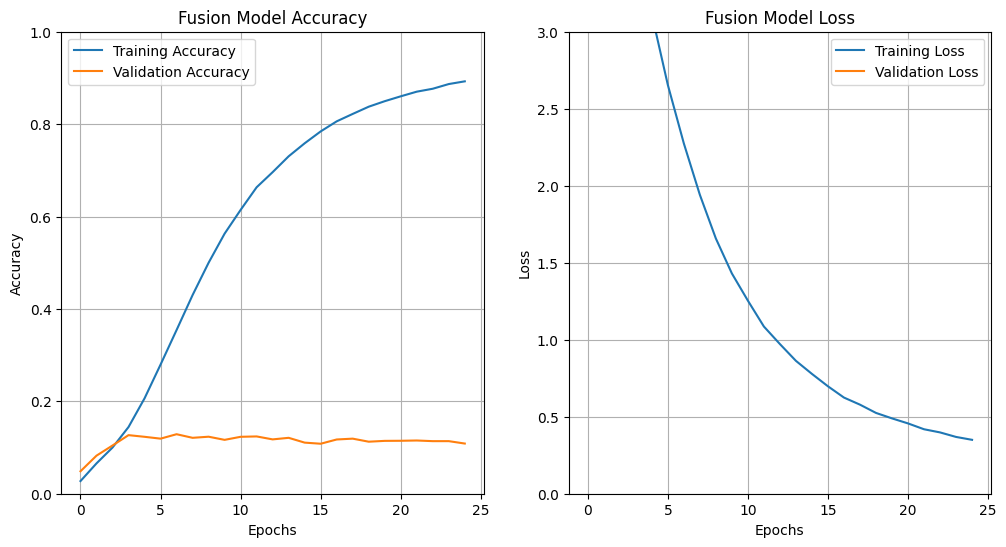

2969/2969 ━━━━━━━━━━━━━━━━━━━━ 166s 55ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step

Evaluation Metrics:
Train-Accuracy: 0.90, F1-score: 0.90, ROC-AUC: 1.00
Validation-Accuracy: 0.11, F1-score: 0.12, ROC-AUC: 0.87
Test-Accuracy: 0.10, F1-score: 0.11, ROC-AUC: 0.87


In [ ]:
import os
import numpy as np
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import extract_archive, check_integrity, download_url, verify_str_arg
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input, optimizers, regularizers  # Import regularizers

# TinyImageNet Dataset Class (Copied from the provided code)
class TinyImageNet(VisionDataset):
    """`tiny-imageNet <http://cs231n.stanford.edu/tiny-imagenet-200.zip>`_ Dataset."""
    base_folder = 'tiny-imagenet-200/'
    url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
    filename = 'tiny-imagenet-200.zip'
    md5 = '90528d7ca1a48142e341f4ef8d21d0de'

    def __init__(self, root, split='train', transform=None, target_transform=None, download=False):
        super(TinyImageNet, self).__init__(root, transform=transform, target_transform=target_transform)
        self.dataset_path = os.path.join(root, self.base_folder)
        self.loader = default_loader
        self.split = verify_str_arg(split, "split", ("train", "val",))

        if self._check_integrity():
            print('Files already downloaded and verified.')
        elif download:
            self._download()
        else:
            raise RuntimeError('Dataset not found. You can use download=True to download it.')
        if not os.path.isdir(self.dataset_path):
            print('Extracting...')
            extract_archive(os.path.join(root, self.filename))

        _, class_to_idx = self.find_classes(os.path.join(self.dataset_path, 'wnids.txt'))
        self.data = self.make_dataset(self.root, self.base_folder, self.split, class_to_idx)
        self.targets = [s[1] for s in self.data]

    def _download(self):
        print('Downloading...')
        download_url(self.url, root=self.root, filename=self.filename)
        print('Extracting...')
        extract_archive(os.path.join(self.root, self.filename))

    def _check_integrity(self):
        return check_integrity(os.path.join(self.root, self.filename), self.md5)

    def __getitem__(self, index):
        img_path, target = self.data[index]
        image = self.loader(img_path)
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return image, target

    def __len__(self):
        return len(self.data)

    @staticmethod
    def find_classes(class_file):
        with open(class_file) as r:
            classes = list(map(lambda s: s.strip(), r.readlines()))
        classes.sort()
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

    @staticmethod
    def make_dataset(root, base_folder, dirname, class_to_idx):
        images = []
        dir_path = os.path.join(root, base_folder, dirname)
        if dirname == 'train':
            for fname in sorted(os.listdir(dir_path)):
                cls_fpath = os.path.join(dir_path, fname)
                if os.path.isdir(cls_fpath):
                    cls_imgs_path = os.path.join(cls_fpath, 'images')
                    for imgname in sorted(os.listdir(cls_imgs_path)):
                        path = os.path.join(cls_imgs_path, imgname)
                        item = (path, class_to_idx[fname])
                        images.append(item)
        else:
            imgs_path = os.path.join(dir_path, 'images')
            imgs_annotations = os.path.join(dir_path, 'val_annotations.txt')
            with open(imgs_annotations) as r:
                data_info = map(lambda s: s.split('\t'), r.readlines())
            cls_map = {line_data[0]: line_data[1] for line_data in data_info}
            for imgname in sorted(os.listdir(imgs_path)):
                path = os.path.join(imgs_path, imgname)
                item = (path, class_to_idx[cls_map[imgname]])
                images.append(item)
        return images


# Preprocess TinyImageNet Data
def preprocess_tinyimagenet(dataset):
    images = []
    labels = []
    for img_path, label in dataset.data:
        image = dataset.loader(img_path)
        image = image.resize((64, 64))  # Resize to 64x64
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), to_categorical(labels, num_classes=200)


def regnetx_block(x, filters, group_width, strides=1):
    groups = max(1, filters // group_width)
    shortcut = x

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x3 Grouped Convolution
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', groups=groups, use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 1x1 Convolution
    x = layers.Conv2D(filters, (1, 1), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x


def build_regnet(input_shape=(64,64,3), num_classes=200, group_width=16):
    inputs = Input(shape=input_shape)

    # Stem
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Define widths using a quantized linear function
    widths = [64, 128, 320, 512]

    # Define depths for each stage
    depths = [2, 4, 6, 2]

    for stage, (width, depth) in enumerate(zip(widths, depths)):
        for block_idx in range(depth):
            stride = 2 if block_idx == 0 and stage > 0 else 1
            x = regnetx_block(x, width, group_width, strides=stride)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Define ConvNeXt Block
def convnext_block(x, filters, strides=1, use_se=False):
    # Initial Conv Layer
    shortcut = x
    x = layers.Conv2D(filters, (7, 7), strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Depthwise Separable Convolution (effectively replacing traditional convolution)
    x = layers.DepthwiseConv2D((3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Pointwise Convolution (1x1)
    x = layers.Conv2D(filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Squeeze-and-Excitation (Optional)
    if use_se:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Dense(filters // 16, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        x = layers.multiply([x, se])

    # Shortcut Connection
    if strides != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Adding shortcut connection
    x = layers.add([x, shortcut])
    x = layers.Activation('gelu')(x)

    return x


# Define ConvNeXt Architecture
def build_convnext(input_shape=(64,64,3), num_classes=200, use_se=False):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # ConvNeXt Blocks with various filter sizes
    x = convnext_block(x, 128, strides=2, use_se=use_se)
    x = convnext_block(x, 256, strides=2, use_se=use_se)
    x = convnext_block(x, 512, strides=2, use_se=use_se)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)

# Define Fusion Model (VGG + ResNet)
def build_fusion_model(input_shape=(64,64,3), num_classes=200):
    # Instantiate the two backbones
    convnext_model = build_convnext(input_shape, num_classes)
    regnet_model = build_regnet(input_shape, num_classes)

    # Define inputs
    input_convnext = Input(shape=input_shape)
    input_regnet = Input(shape=input_shape)

    # Extract embeddings

    convnext_features = convnext_model(input_convnext)
    regnet_features = regnet_model(input_regnet)

    # Concatenate embeddings
    combined_features = layers.Concatenate()([convnext_features, regnet_features])

    # Fully connected layers after fusion
    x = layers.Dense(512, activation='relu')(combined_features)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Final model
    fusion_model = models.Model(inputs=[input_convnext, input_regnet], outputs=output)
    return fusion_model


# Load TinyImageNet Dataset
train_dataset = TinyImageNet('./data', split='train', download=True)
test_dataset = TinyImageNet('./data', split='val', download=False)

# Preprocess Data
train_images, train_labels = preprocess_tinyimagenet(train_dataset)
test_images, test_labels = preprocess_tinyimagenet(test_dataset)

# Split the dataset into training and validation sets while preserving class distribution
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.05, stratify=np.argmax(train_labels, axis=1), random_state=42
)

# Debugging: Check data shapes and labels
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Debugging: Check class distribution
print("Training class distribution:", np.sum(train_labels, axis=0))
print("Validation class distribution:", np.sum(val_labels, axis=0))
print("Test class distribution:", np.sum(test_labels, axis=0))


# Initialize Fusion Model
fusion_model = build_fusion_model((64, 64, 3), 200)
fusion_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Fusion Model
fusion_history = fusion_model.fit(
    [train_images, train_images], train_labels,
    epochs=25,
    batch_size=32,
    validation_data=([val_images, val_images], val_labels),
    verbose=1
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fusion_history.history['accuracy'], label='Training Accuracy')
plt.plot(fusion_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fusion Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(fusion_history.history['loss'], label='Training Loss')
plt.plot(fusion_history.history['val_loss'], label='Validation Loss')
plt.title('Fusion Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.grid()

plt.show()

# Evaluate the Model
def evaluate_model(model, train_images, train_labels, val_images, val_labels, test_images, test_labels):
    train_preds = model.predict([train_images, train_images])
    val_preds = model.predict([val_images, val_images])
    test_preds = model.predict([test_images, test_images])

    train_preds_labels = np.argmax(train_preds, axis=1)
    val_preds_labels = np.argmax(val_preds, axis=1)
    test_preds_labels = np.argmax(test_preds, axis=1)

    train_labels = np.argmax(train_labels, axis=1)
    val_labels = np.argmax(val_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

    train_f1 = f1_score(train_labels, train_preds_labels, average='macro')
    val_f1 = f1_score(val_labels, val_preds_labels, average='macro')
    test_f1 = f1_score(test_labels, test_preds_labels, average='macro')

    train_roc_auc = roc_auc_score(to_categorical(train_labels, num_classes=200), train_preds, average='macro', multi_class='ovr')
    val_roc_auc = roc_auc_score(to_categorical(val_labels, num_classes=200), val_preds, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(to_categorical(test_labels, num_classes=200), test_preds, average='macro', multi_class='ovr')

    train_accuracy = np.mean(train_preds_labels == train_labels)
    val_accuracy = np.mean(val_preds_labels == val_labels)
    test_accuracy = np.mean(test_preds_labels == test_labels)

    print("\nEvaluation Metrics:")
    print(f"Train-Accuracy: {train_accuracy:.2f}, F1-score: {train_f1:.2f}, ROC-AUC: {train_roc_auc:.2f}")
    print(f"Validation-Accuracy: {val_accuracy:.2f}, F1-score: {val_f1:.2f}, ROC-AUC: {val_roc_auc:.2f}")
    print(f"Test-Accuracy: {test_accuracy:.2f}, F1-score: {test_f1:.2f}, ROC-AUC: {test_roc_auc:.2f}")


# Evaluate the Fusion Model
evaluate_model(fusion_model, train_images, train_labels, val_images, val_labels, test_images, test_labels)